#### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
InteractiveShell.ast_node_interactivity = "all"

#### Setting the working directory

In [3]:
os.chdir('C:/Users/aksha/Desktop/Machine learning/Housing project')

### Exploring the data

#### Importing the training dataset_one 

In [4]:
dataset_one_original= pd.read_csv('housing_train.csv', header=1)
dataset_one_original.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### overall info of the dataset_one

In [5]:
dataset_one_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### So there are total of 1460 rows in the dataset_one. Following are the columns that have missing data in it:

- LotFrontage:      259 null object
- Alley:            1369 null object
- MasVnrType:       8 null object
- MasVnrArea:      8 null float64
- BsmtQual:         37 null object
- BsmtCond:         37 null object
- BsmtExposure:     38 null object
- BsmtFinType1:     37 null object
- BsmtFinType2:     38 nnull object
- Electrical:      1 null object
- FireplaceQu:     690 null object
- GarageType:     81 null object
- GarageYrBlt:     81 null float64
- GarageFinish:    81 null object
- GarageQual:      81 null object
- GarageCond:      81 null object
- PoolQC:          1453 null object
- Fence:           1179 null object
- MiscFeature:     1406 null object

Generally mssing data can be handled either by imputation or by deletion. Missing values can be either random i.e. the occurence of missing or non missing values do not depend on the other variables or they can be systematic i.e. the occurences of missing or non missing values depend on other variables. Missing data should be carefully handled in the latter case as missing data can help in understanding the dependent variable. In our case the columns - Alley, FirePlaceQu, PoolQc, Fence, MiscFeature have huge amount of missing values (more than 47% of the data) and the occurences of their values missing do not seem to depend on other variables. So we can safely delete those columns. 
I am also deleting the id column as it does not provide any useful information.

In [6]:
dataset_one_original.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [7]:
dataset_one = dataset_one_original

In [8]:
dataset_one.drop([ 'Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1, inplace=True);
dataset_one.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope    ...    EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl    ...                0         0           0   
1    AllPub       FR2       Gtl    ...                0         0           0   
2    AllPub    Inside       Gtl    ...                0         0           0   
3    AllPub    Corner       Gtl    ...              272         0           0   
4    AllPub       FR2       Gtl    ...                0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

#### For other columns with missing data:
1) LotFrontage: LotFrontage describes the linear feet of street connected to property. This seems to be random type of missing data. There is another column that is closely related to this - "Street" - which describes the type of road access to the property. Street has no missing data in it. If all the properties have street access then it should have had LotFrontage value as well. This point infers that the data is randomly missing or other case would be that the lotFrontage house is very less and hence not reported. So I have replaced the missing values of this column to 0. I did not delete the rows with mssing values as that would have caused loss of information of other columns and we have limited number of training points. 

2) MasVnrType and MasVnrArea represent the type and area of Masonry veneer type (the stone or other decorative layer over the outer walls). This also is a random type of missing data. We can safely delete the rows with missing values as only 8 values are missing but again I am reluctant to do so as I do not want to lose other information. I will replace the missing value with "None" for MasVnrType and 0 for MasVnrArea

3) Now the features related to Basement (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) have NA as values which Pandas think are missing values. But if we look at the data description, the data has NA values to describe that the houses have no basement. So we do not actually have missing values but the houses lack basement. So for these columns I will replcae the missing data with "None" for categorical columns and 0 for numeric columns. 

4) Electrical has only 1 missing value. I will replace it with "None"

5) The situation with garage related columns is the same as with basement. They do not have missing value as such but the houses that do not have garages have been taken as mssing values by pandas. So here too I will substitute the values with "None" or 0 as appropriate.


In [9]:
dataset_one['LotFrontage'] = dataset_one['LotFrontage'].fillna(0)

In [10]:
dataset_one['MasVnrType'] = dataset_one['MasVnrType'].fillna("None")

In [11]:
dataset_one['MasVnrArea'] = dataset_one['MasVnrType'].fillna(0)

In [12]:
dataset_one['BsmtQual'] = dataset_one['BsmtQual'].fillna("None")

In [13]:
dataset_one['BsmtCond'] = dataset_one['BsmtCond'].fillna("None")

In [14]:
dataset_one['BsmtExposure'] = dataset_one['BsmtExposure'].fillna("None")

In [15]:
dataset_one['BsmtFinType1'] = dataset_one['BsmtFinType1'].fillna("None")

In [16]:
dataset_one['BsmtFinType2'] = dataset_one['BsmtFinType2'].fillna("None")

In [17]:
dataset_one['Electrical'] = dataset_one['Electrical'].fillna("None")

In [18]:
dataset_one['GarageType'] = dataset_one['GarageType'].fillna("None")

In [19]:
dataset_one['GarageYrBlt'] = dataset_one['GarageYrBlt'].fillna("None")

In [20]:
dataset_one['GarageFinish'] = dataset_one['GarageFinish'].fillna("None")

In [21]:
dataset_one['GarageQual'] = dataset_one['GarageQual'].fillna("None")

In [22]:
dataset_one['GarageCond'] = dataset_one['GarageCond'].fillna("None")

### Dealing with outliers!

To detect outliers let us first find out which of the features are numeric. Now the features can be either numeric or categorical. Sometimes some features are represented as numbers but they are actually categories. In our case MSSubClass, GarageCars, etc. are some of such features. We will be dealing with outliers in case of features with continuous numeric values and not discreet values as with the above mentioned features (MSSubClass, GarageCars, etc.)

So let us first find which of the features are numeric data types and then out of those features we will select the features that have continuous values.

In [23]:
num_col = list(dataset_one._get_numeric_data().columns)
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

So the columns in the above list are the numeric features. But it also contains features with numeric but discreet values. They are:

1) MSSubclass

2) OverallQual

3) OverallCond

4) YearBuilt

5) YearRemodAdd

6) BsmtFullBath

7) BsmtHalfBath

8) FullBath

9) HalfBath

10) BedroomAbvGr

11) KitchenAbvGr

12) TotRmsAbvGrd

13) Fireplaces

14) GarageCars

So let us discard those features so as to test the remaining features for outliers.


In [24]:
num_col = ['LotFrontage', 'LotArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

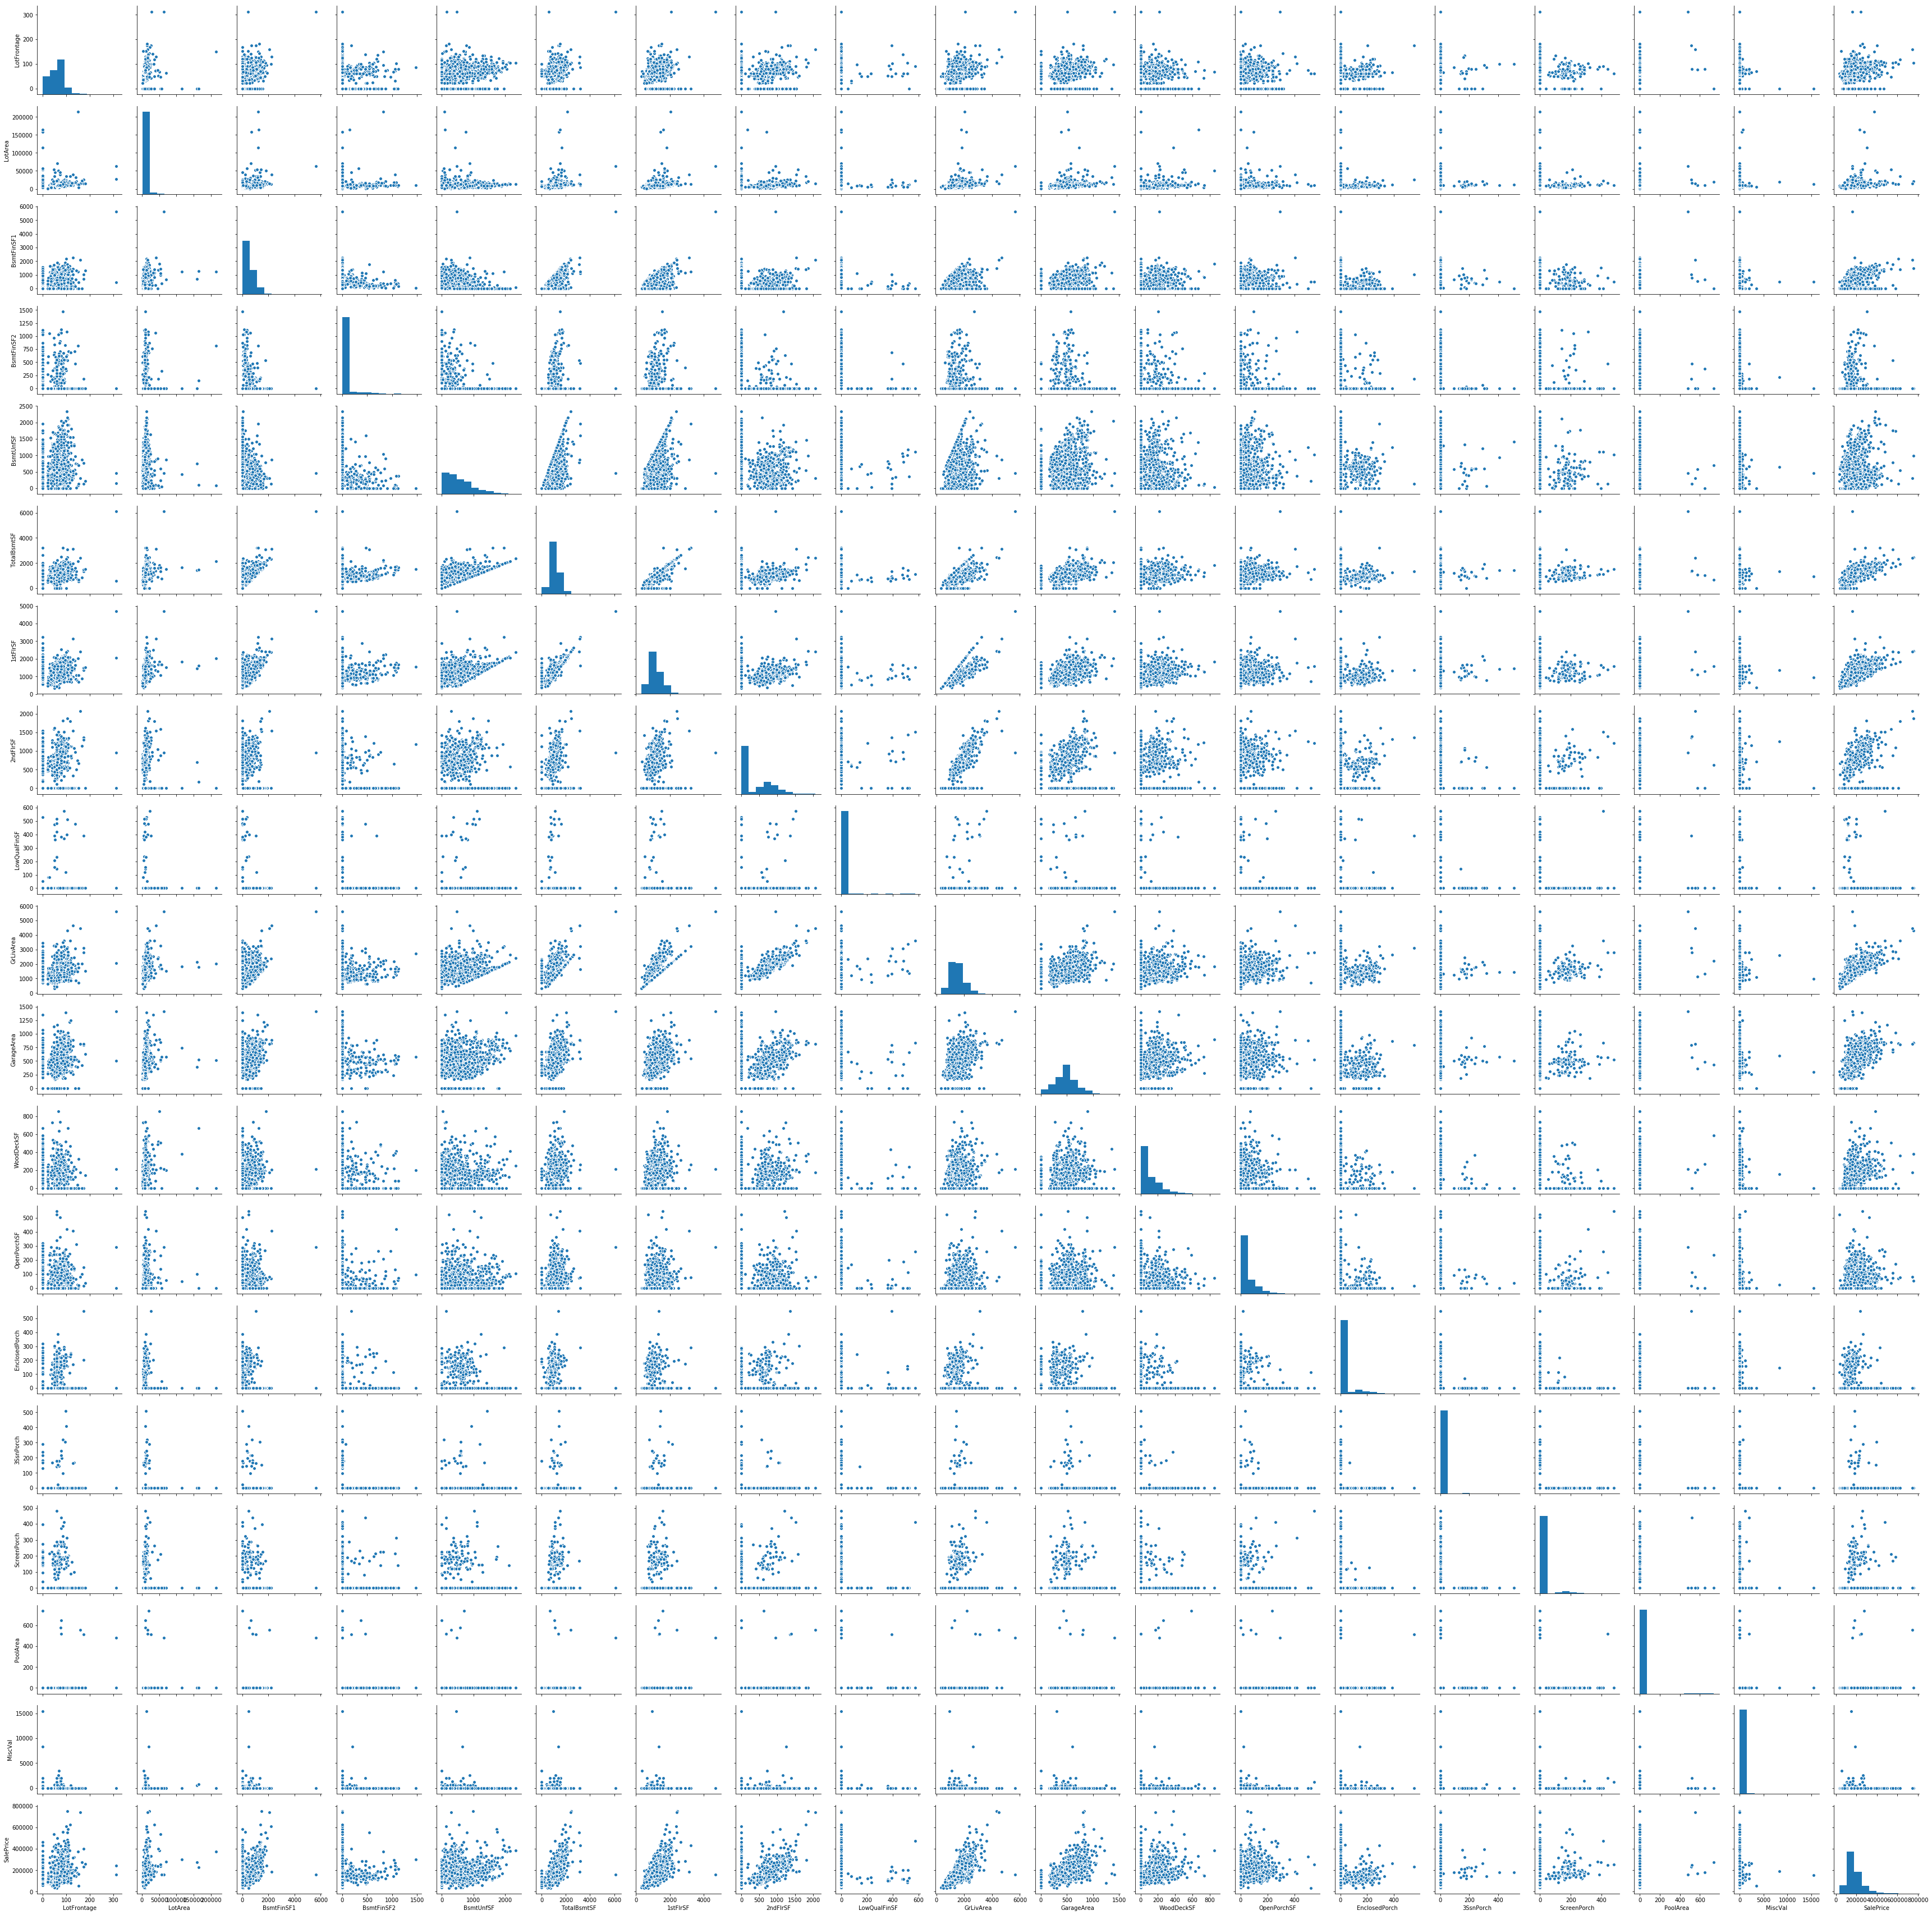

In [23]:
%matplotlib inline
df = dataset_one[num_col]
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


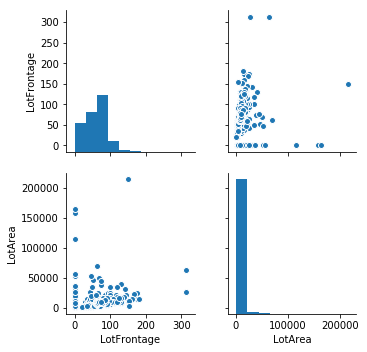

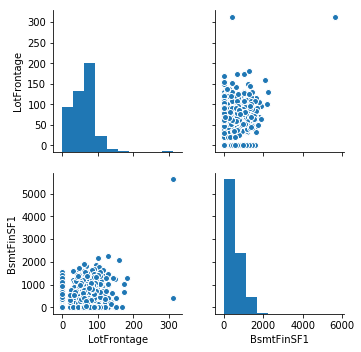

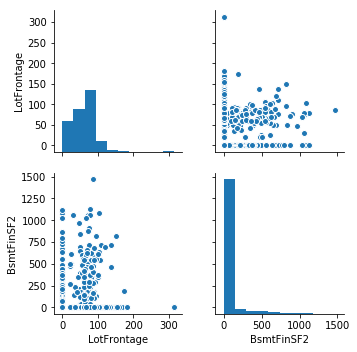

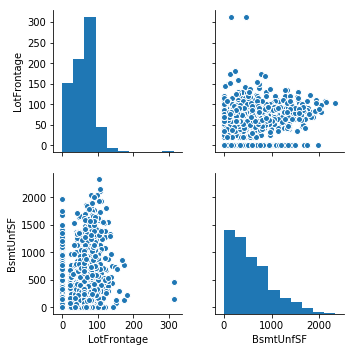

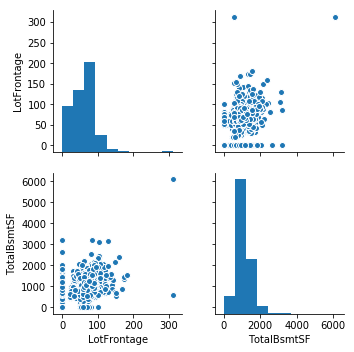

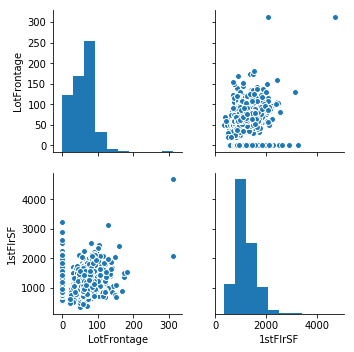

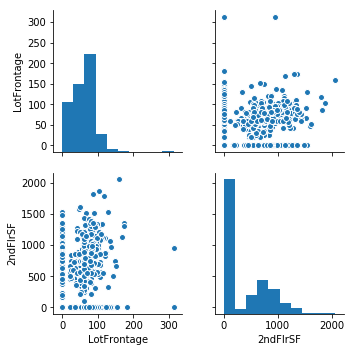

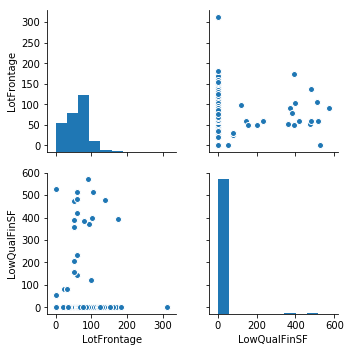

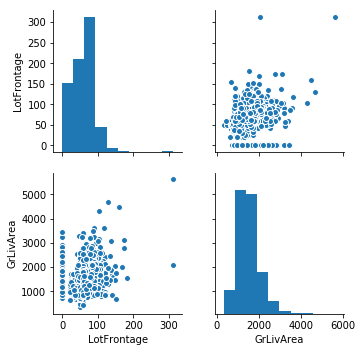

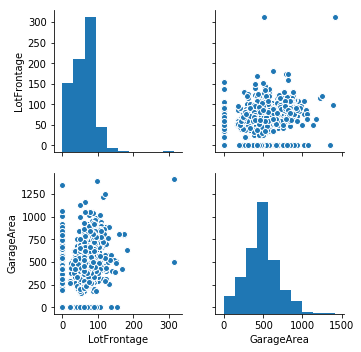

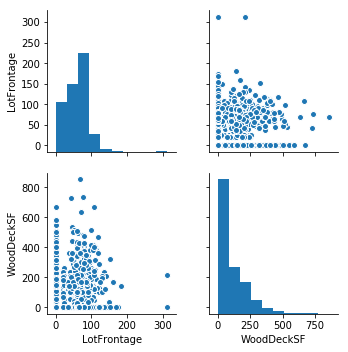

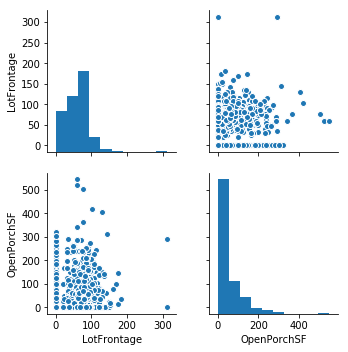

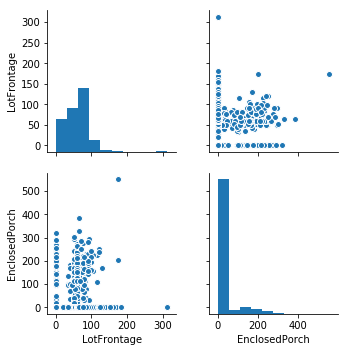

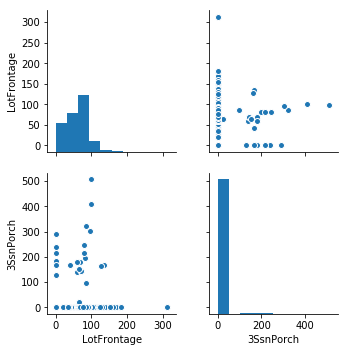

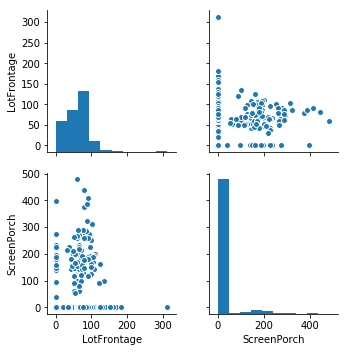

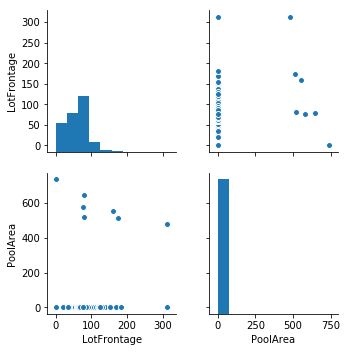

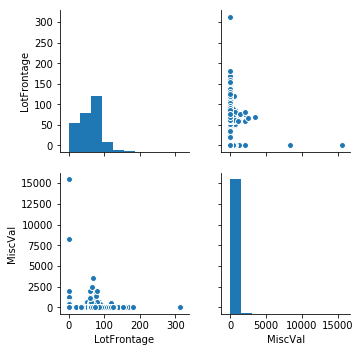

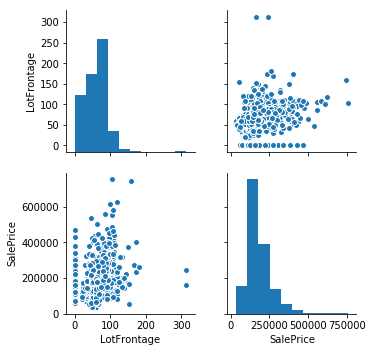

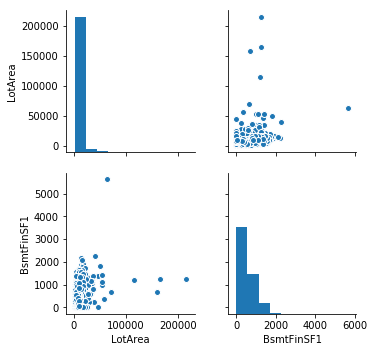

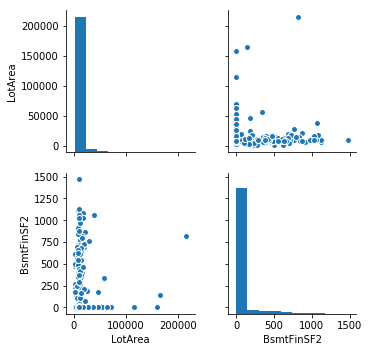

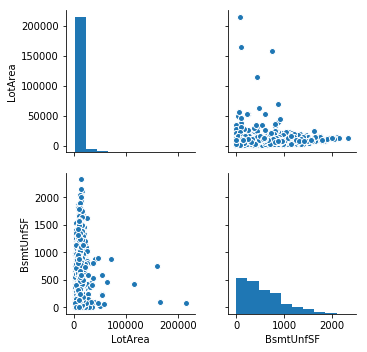

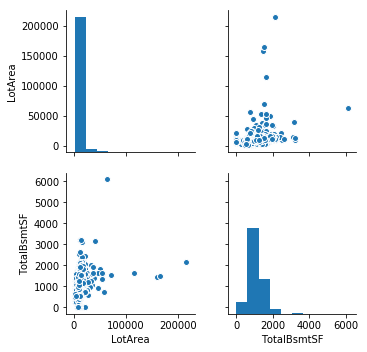

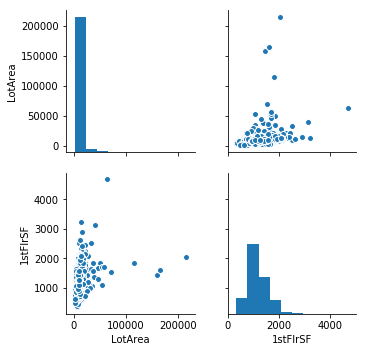

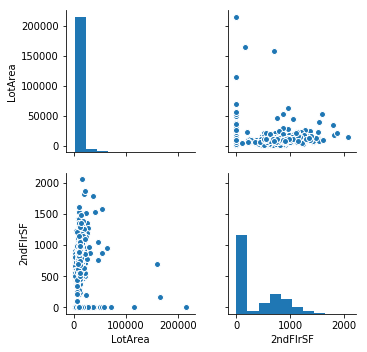

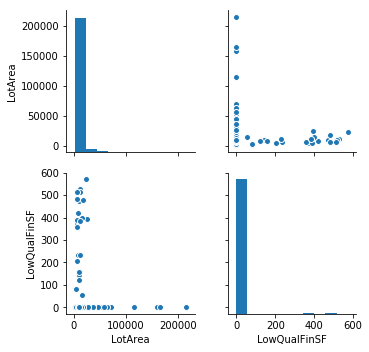

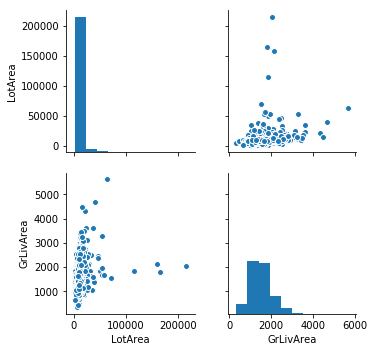

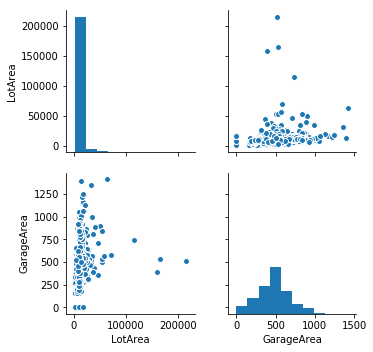

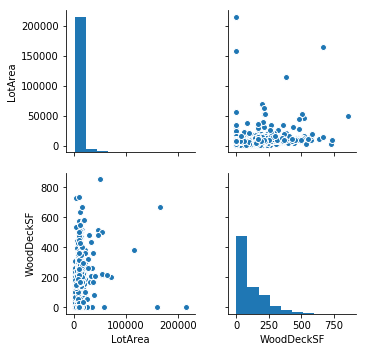

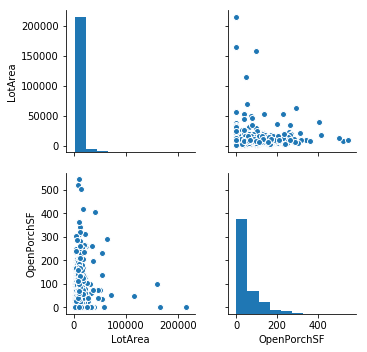

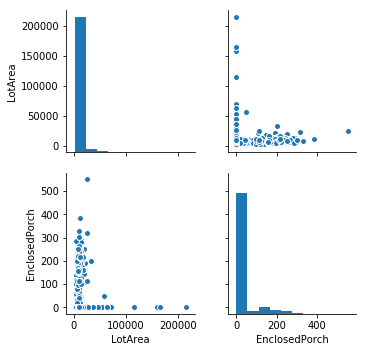

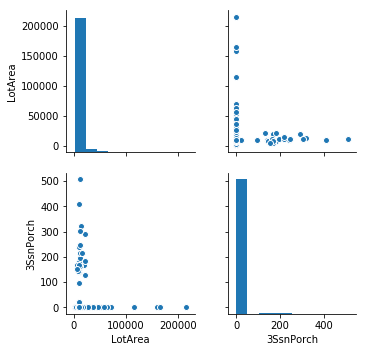

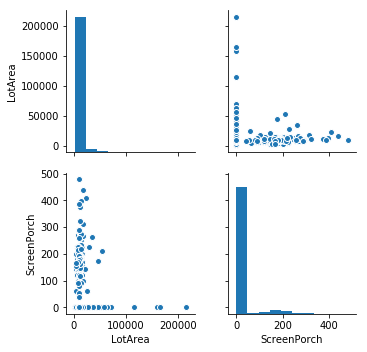

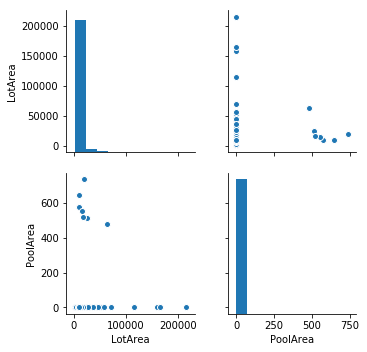

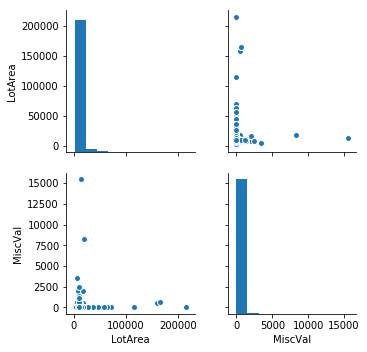

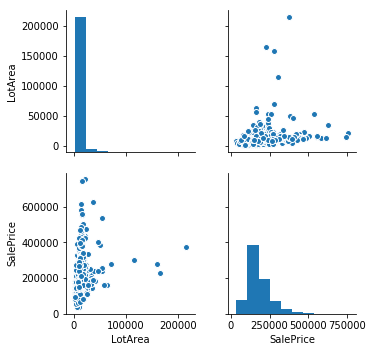

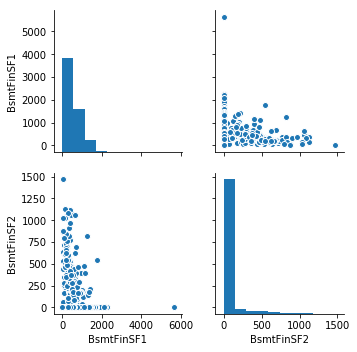

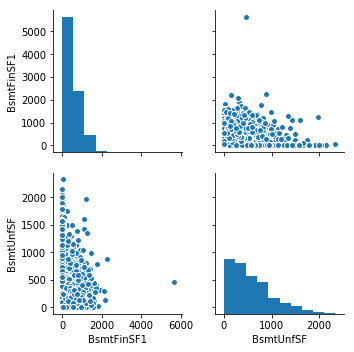

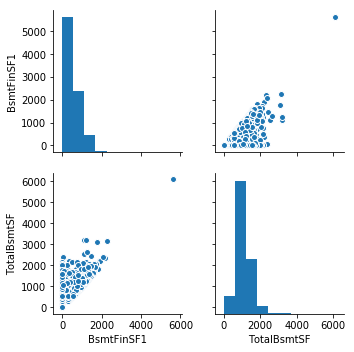

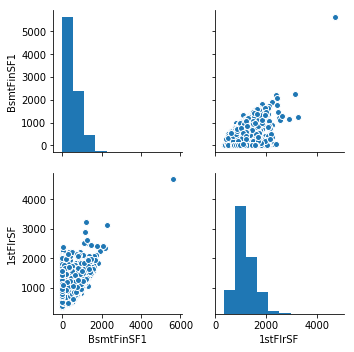

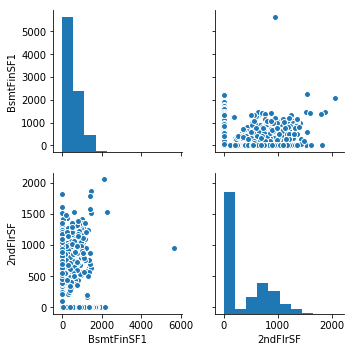

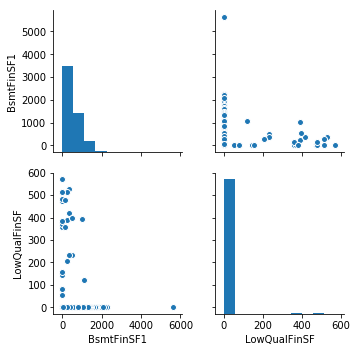

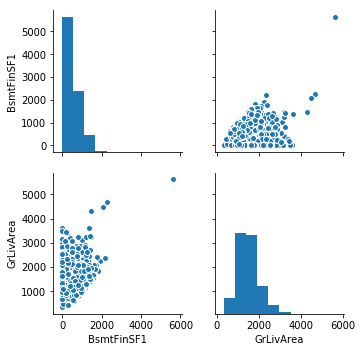

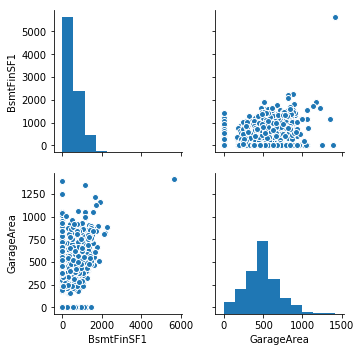

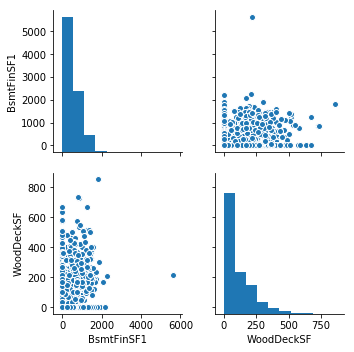

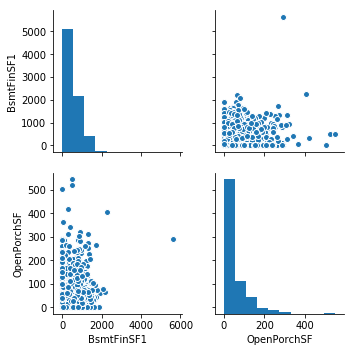

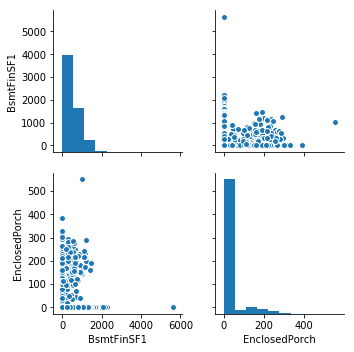

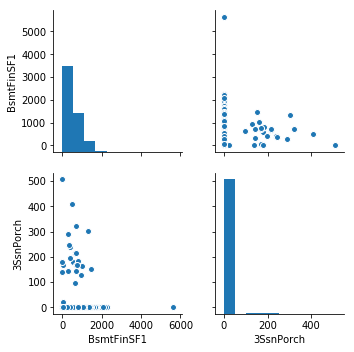

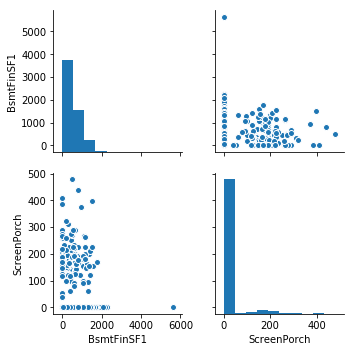

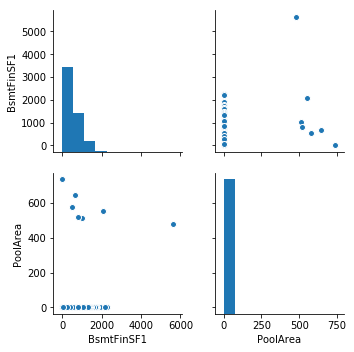

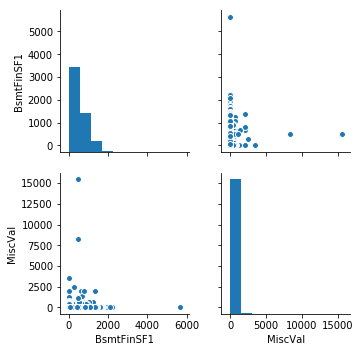

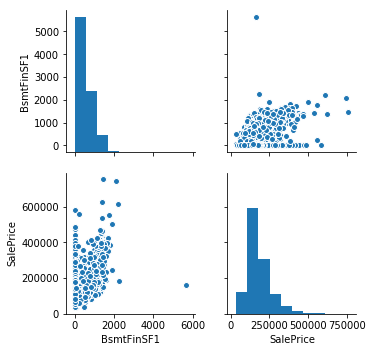

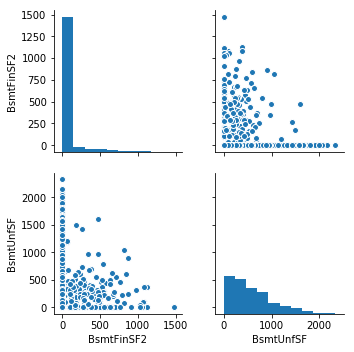

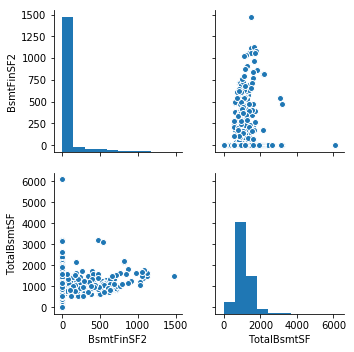

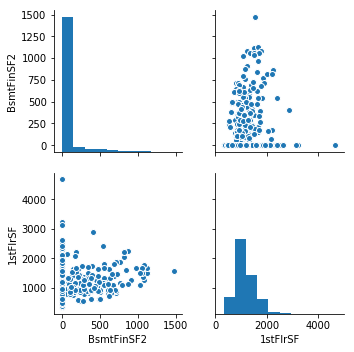

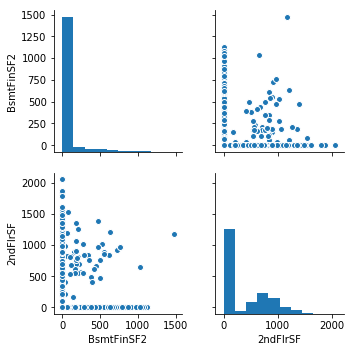

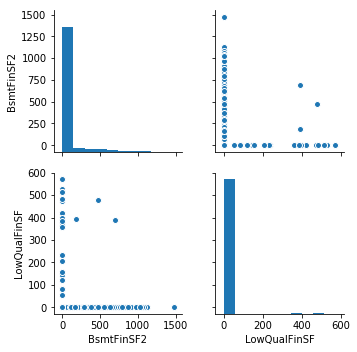

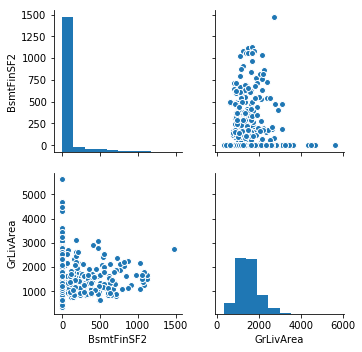

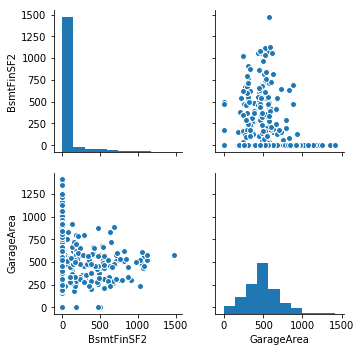

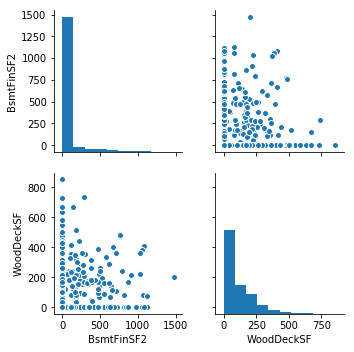

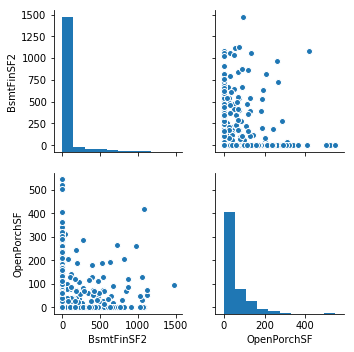

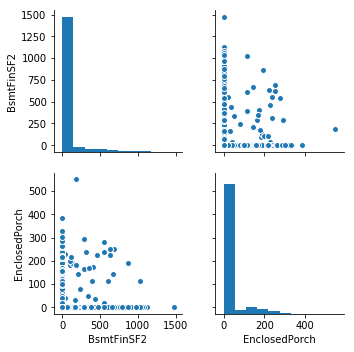

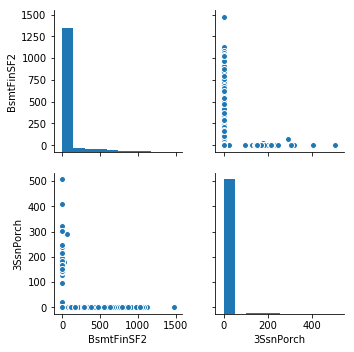

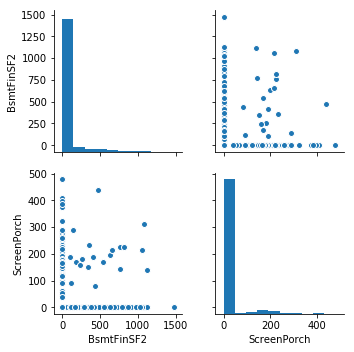

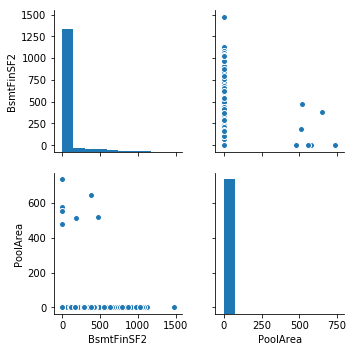

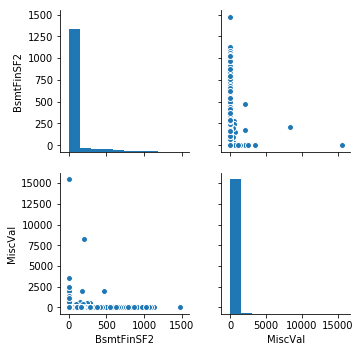

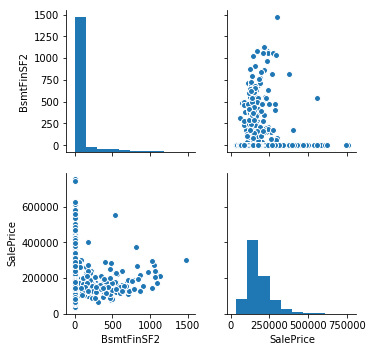

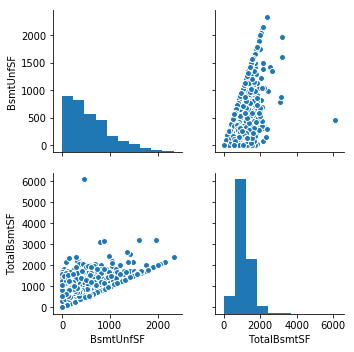

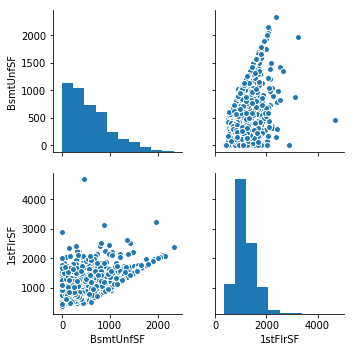

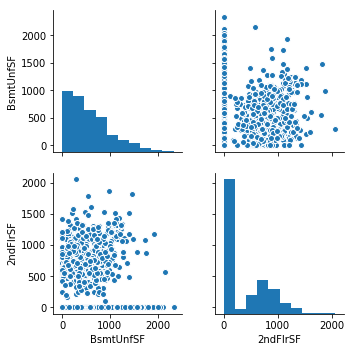

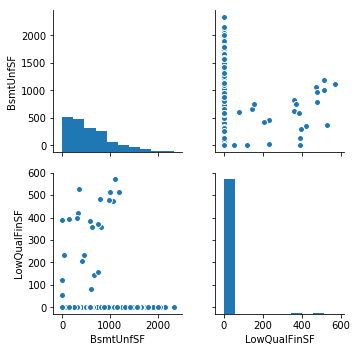

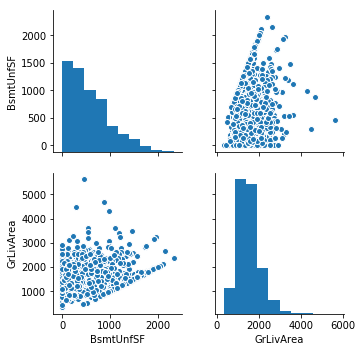

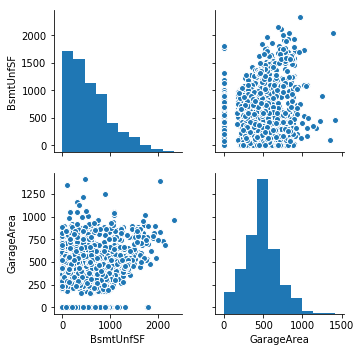

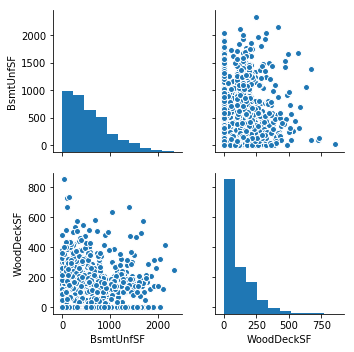

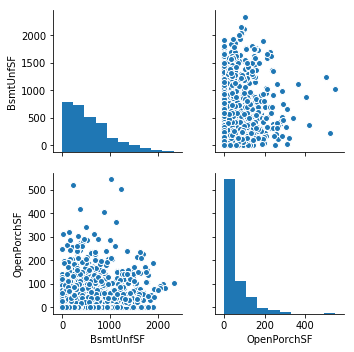

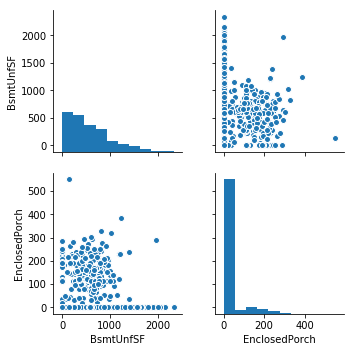

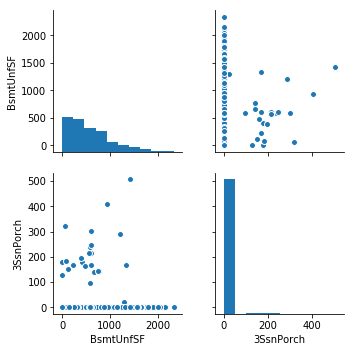

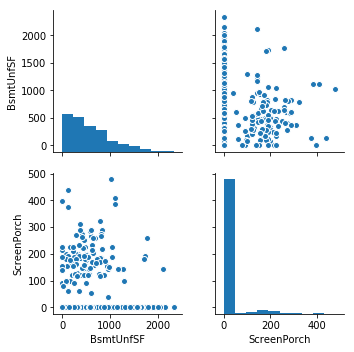

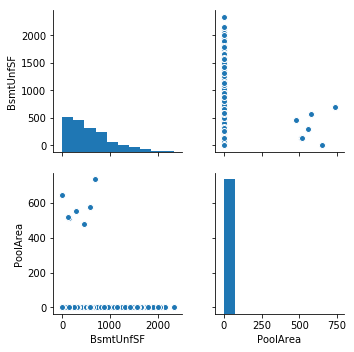

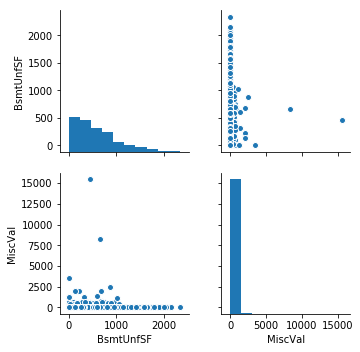

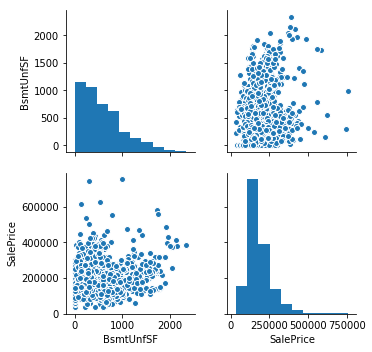

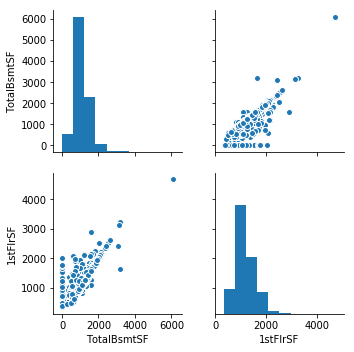

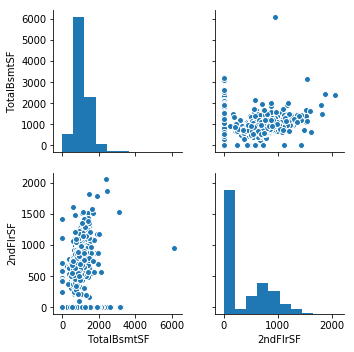

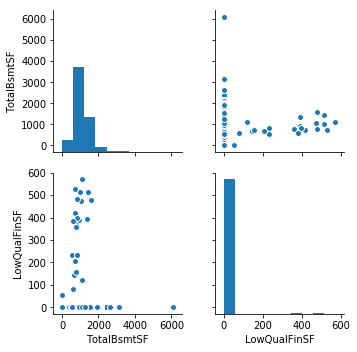

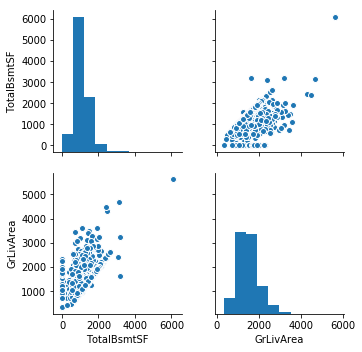

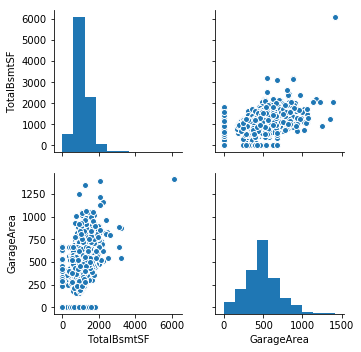

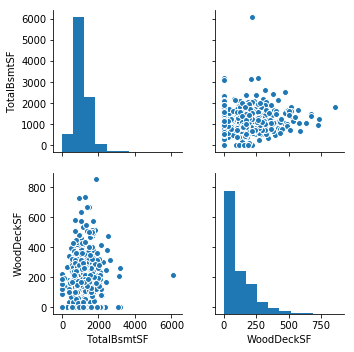

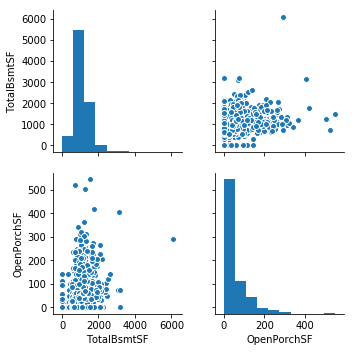

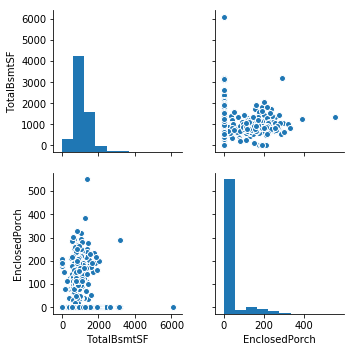

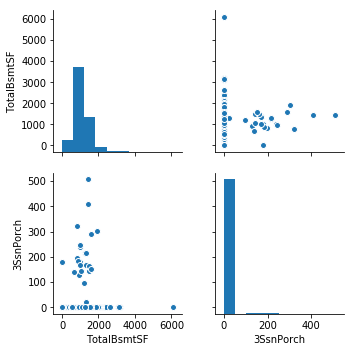

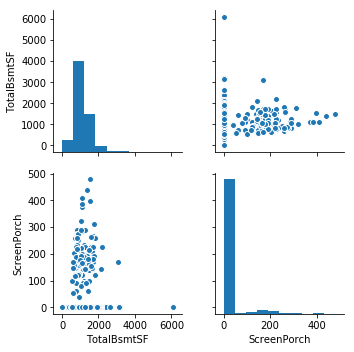

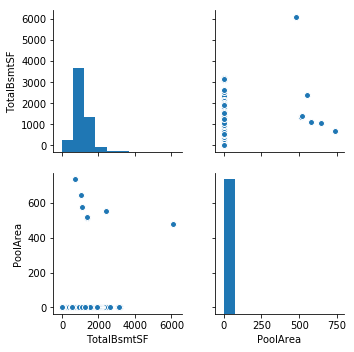

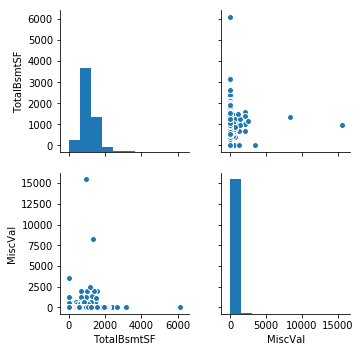

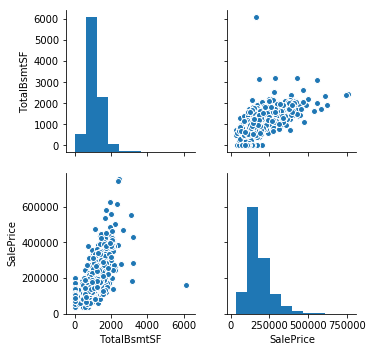

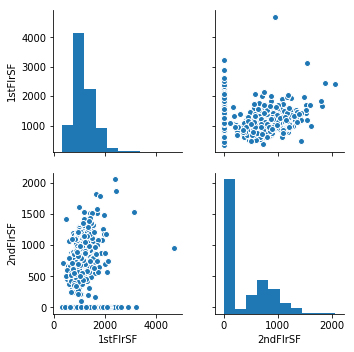

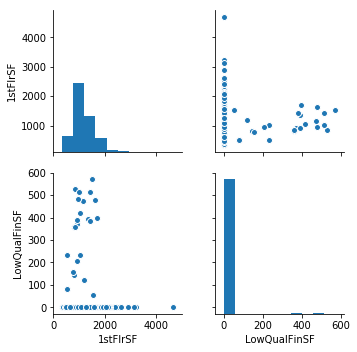

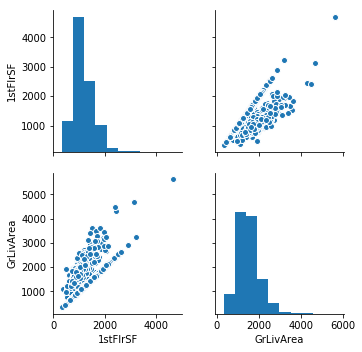

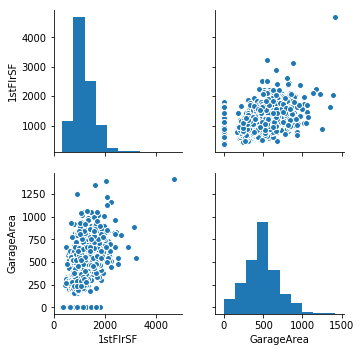

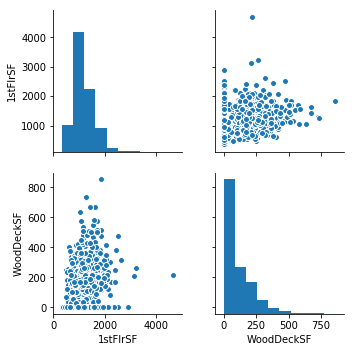

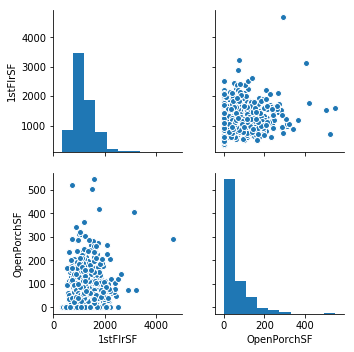

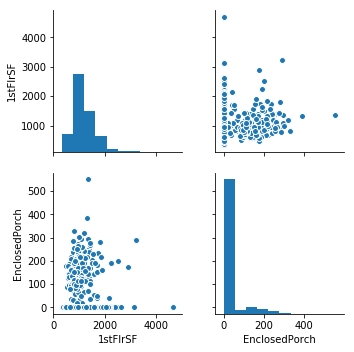

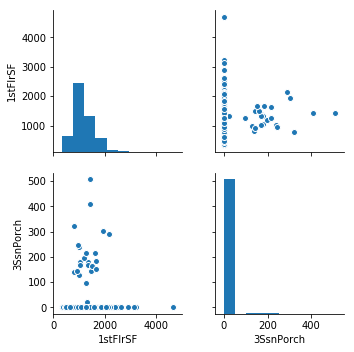

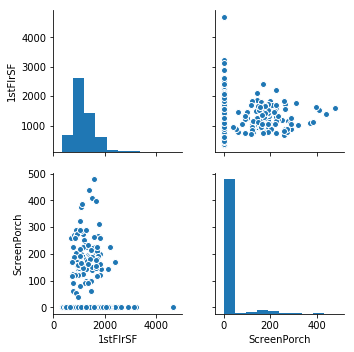

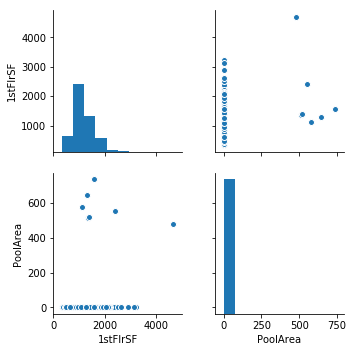

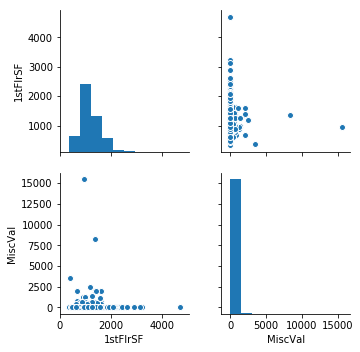

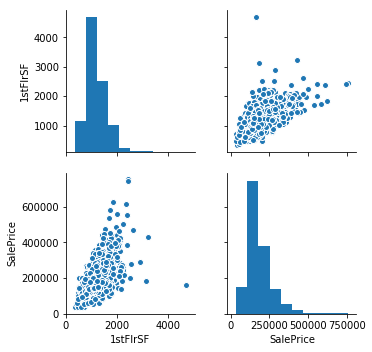

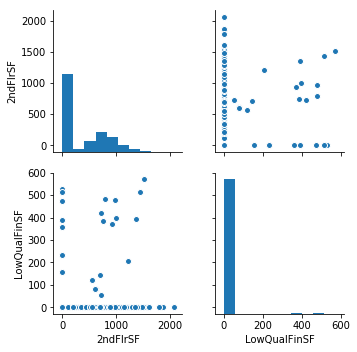

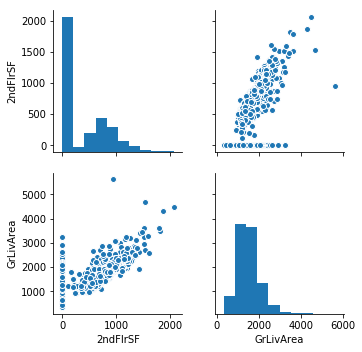

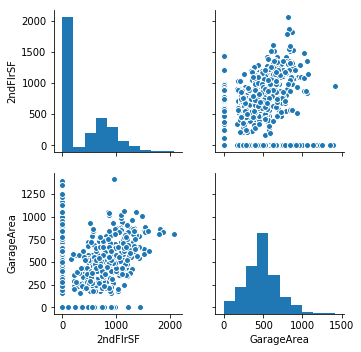

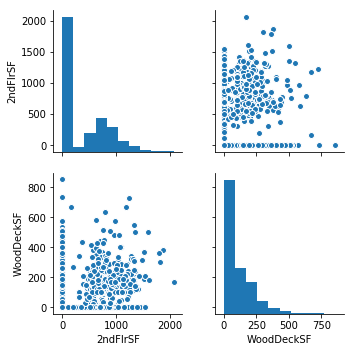

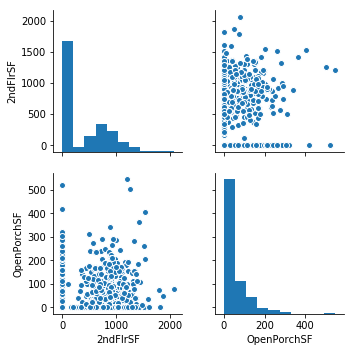

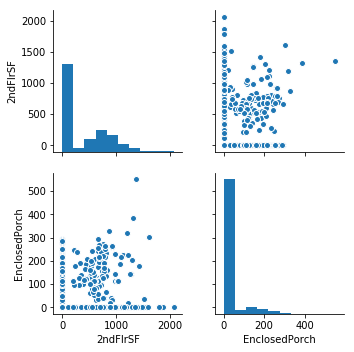

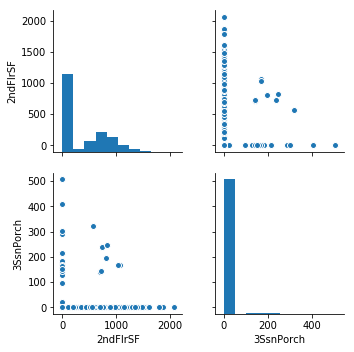

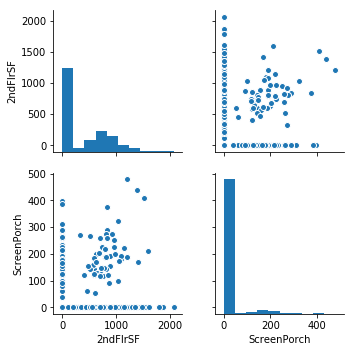

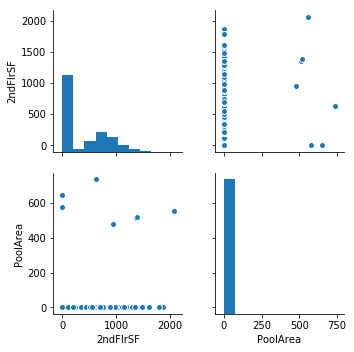

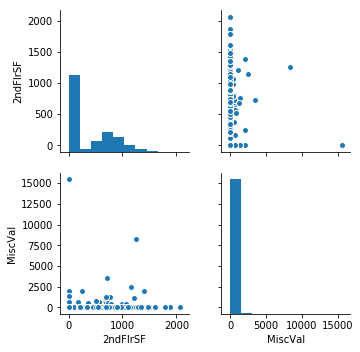

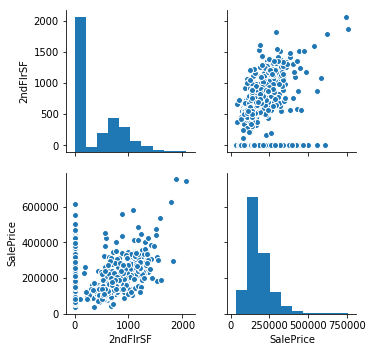

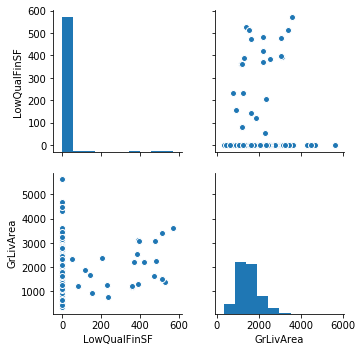

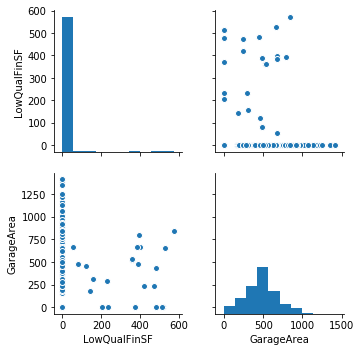

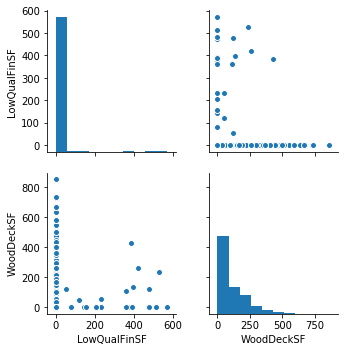

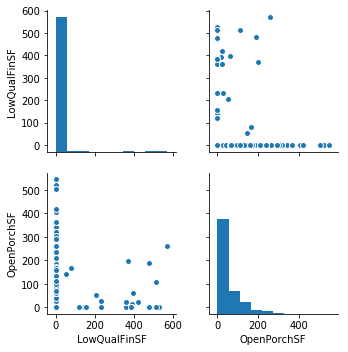

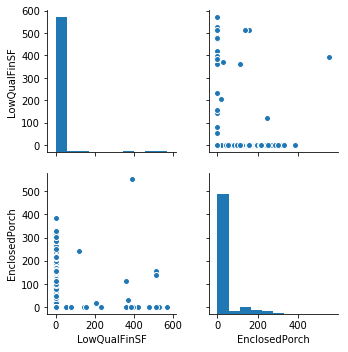

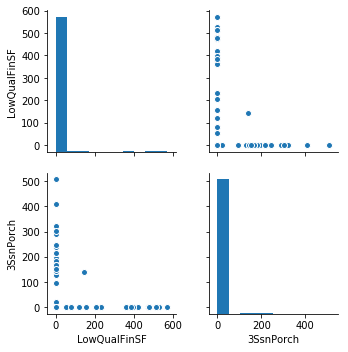

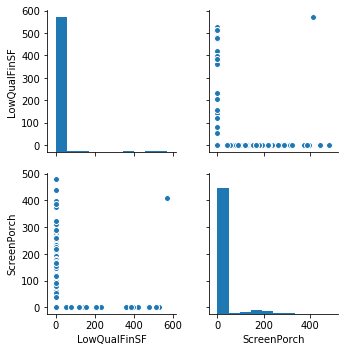

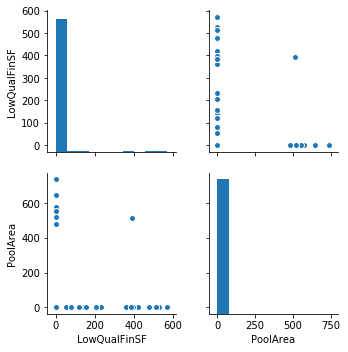

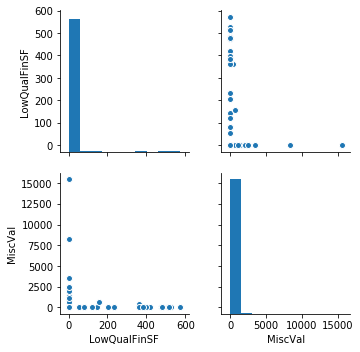

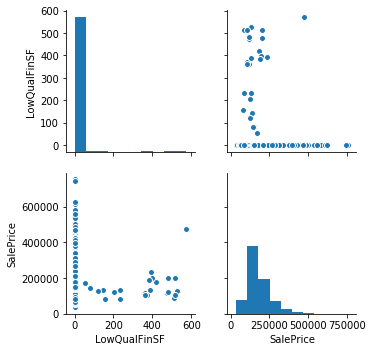

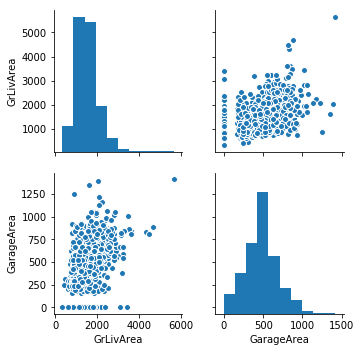

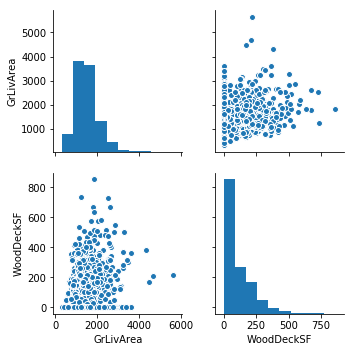

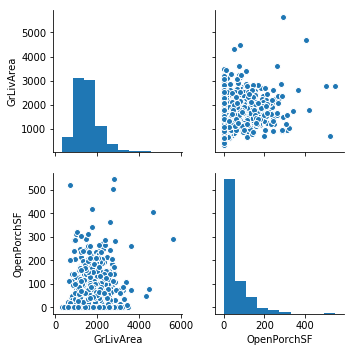

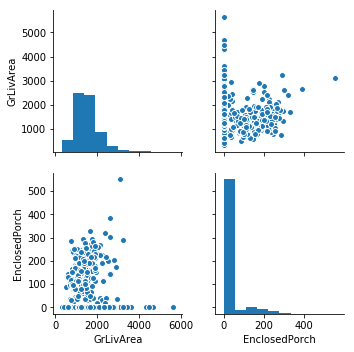

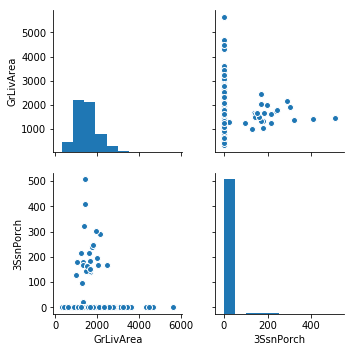

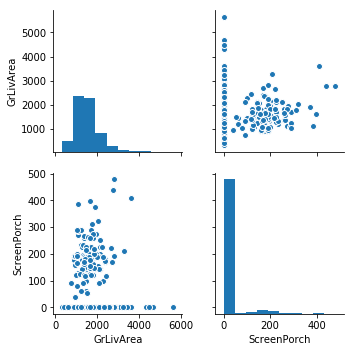

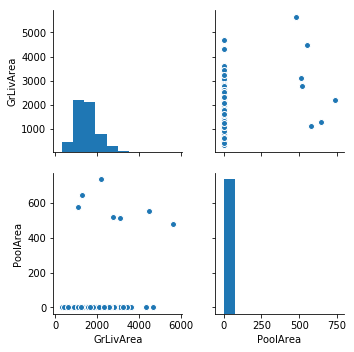

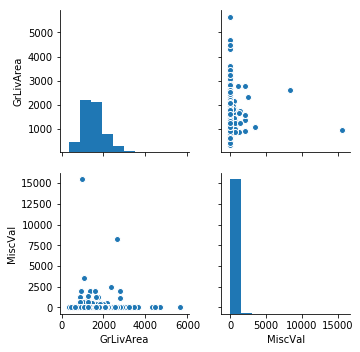

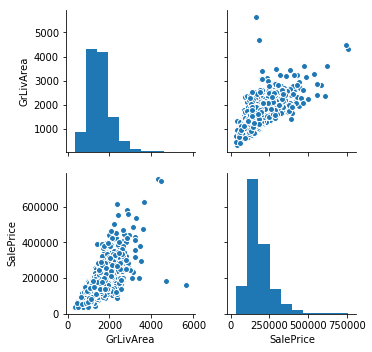

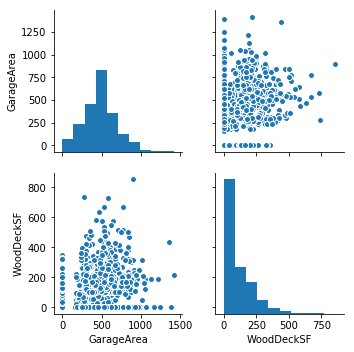

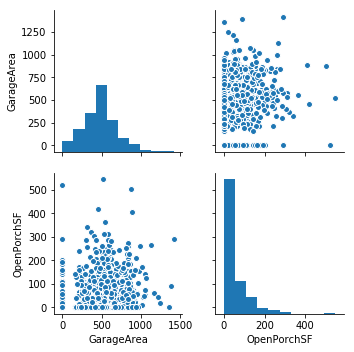

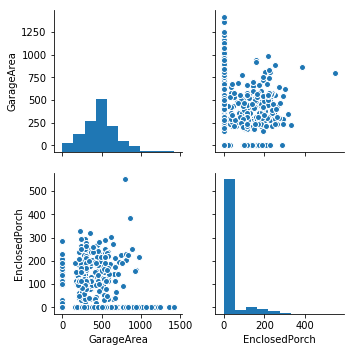

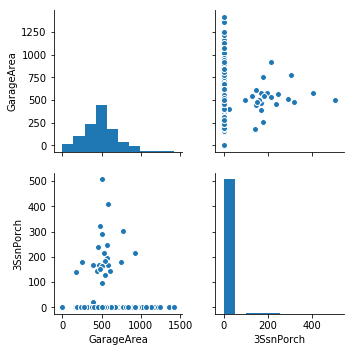

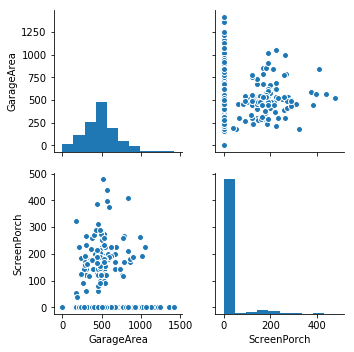

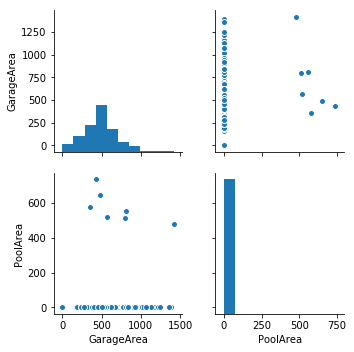

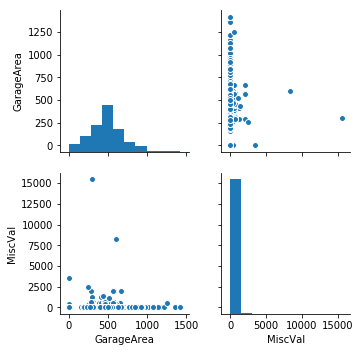

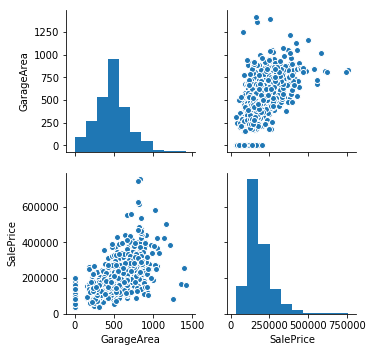

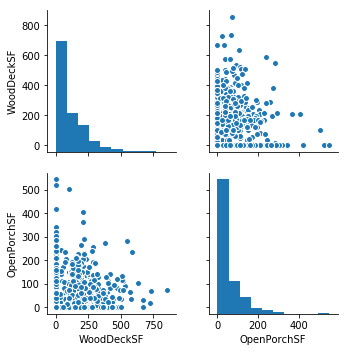

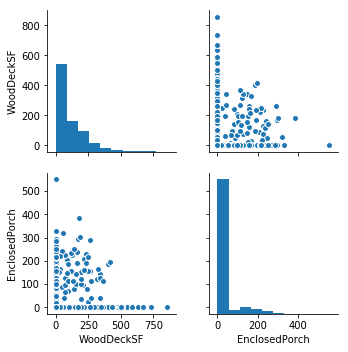

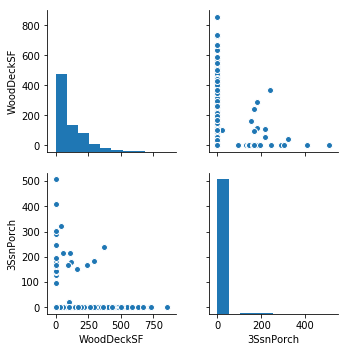

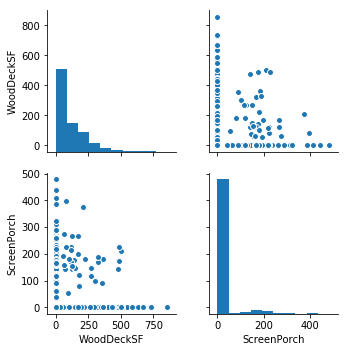

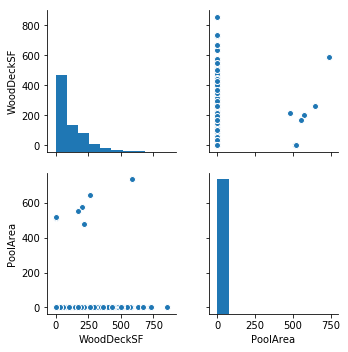

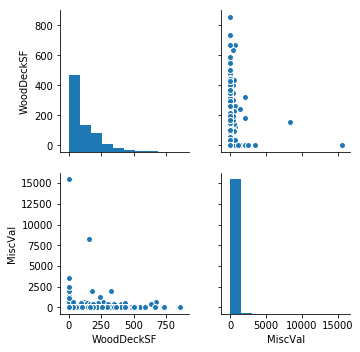

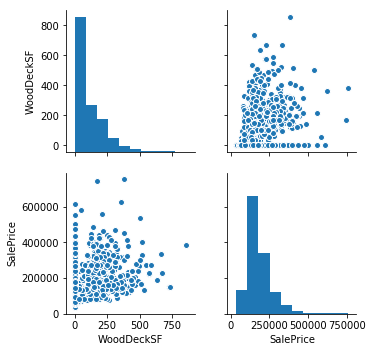

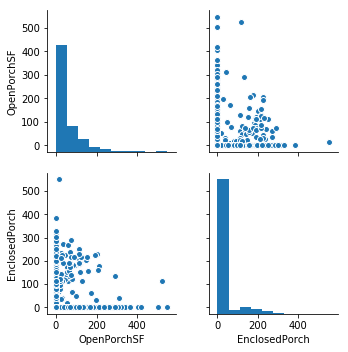

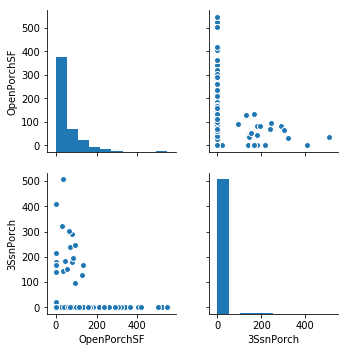

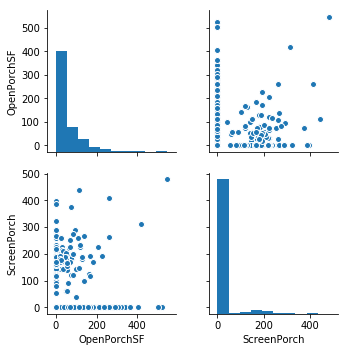

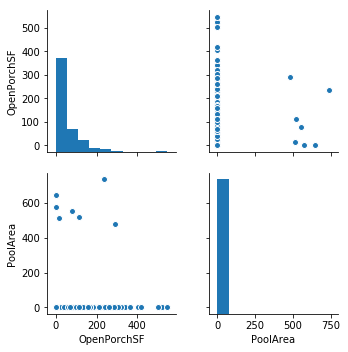

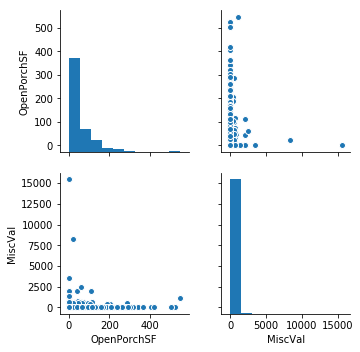

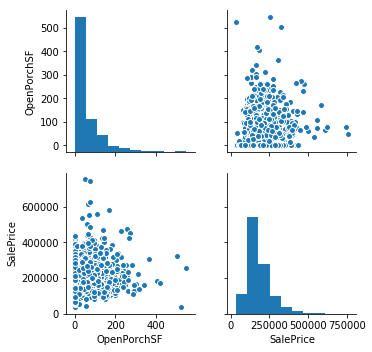

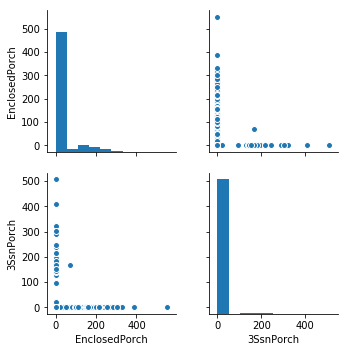

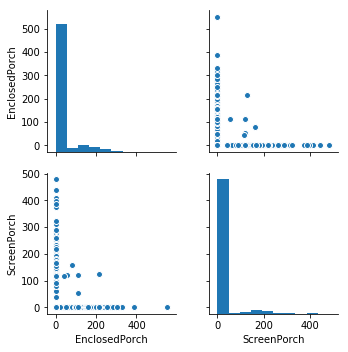

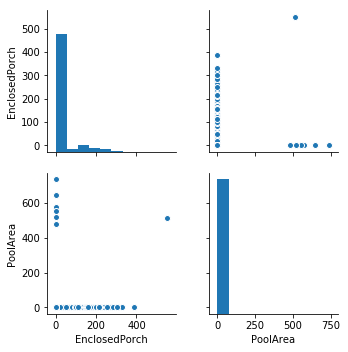

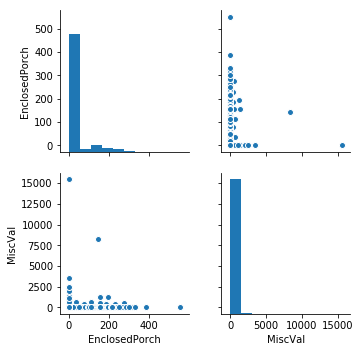

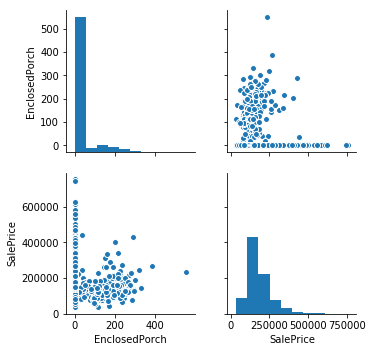

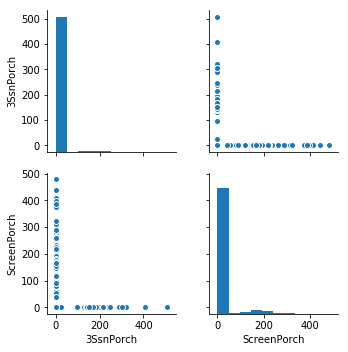

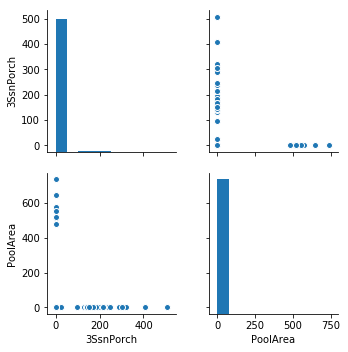

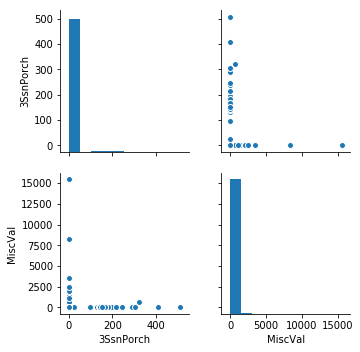

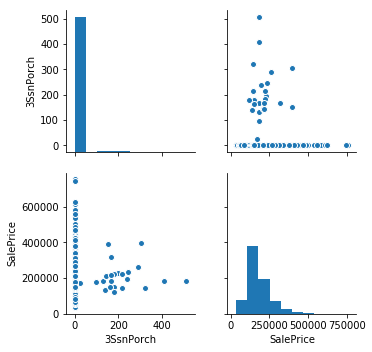

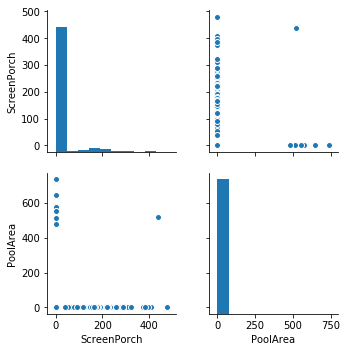

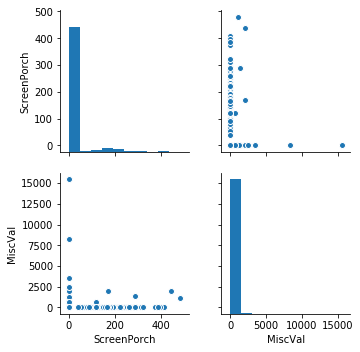

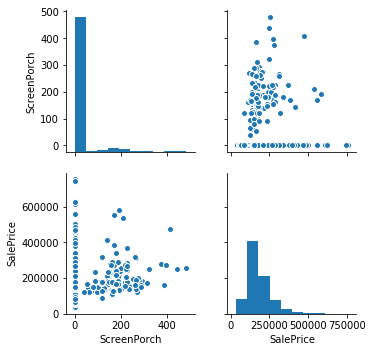

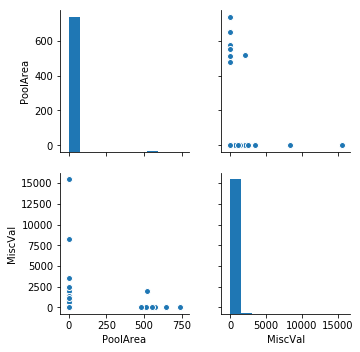

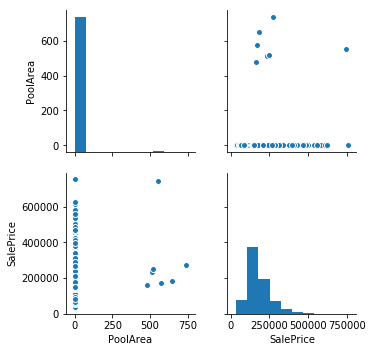

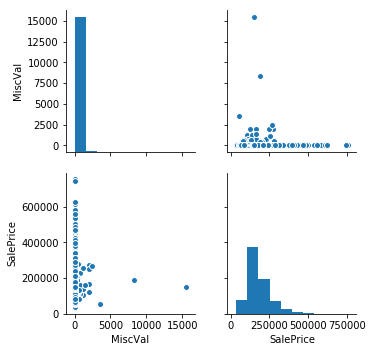

In [23]:
%matplotlib inline
for i in range(len(num_col)-1):
    for j in range(i+1, len(num_col)):
        sns.pairplot(dataset_one[[num_col[i],num_col[j]]]);

We could have just plotted a matrix of scatter plots instead of ploting for every two features. I did the latter because since we have so many features, the individual plots in the matrix would have been very small to look at and get insights. 

Thing to look for in these plots is whether the features have a linear trend against Sale price if you want to go with linear regression model. Another thing is whether the features show a specific trend between themselves. If they do that means they are correlated. Correlated features can create problems for some machine learning algorithms such as linear regression because one of the assumption for such models is that features are independent. In our case I can see that the features show linear trend agaisnt Sale prices and seem independent with respect to each other. 

<b>And the third one is the outliers </b>. Outliers can be seen sitting at some corner of the scatter plot or in the tail regions of the histograms. 


The very obvious outliers to me are the ones in the LotArea feature.The points above 100,000 seem off. I checked it against sale price to verify if these points are valid outliers. In the plot of SalePrice vs LotArea I found that the prices of these houses are somewherre around the average values of Sale Price. If the LotArea is higher then the prices should have been higher too! But that was not the case. (May be they are the ones that you find in the horror movies -  big house somewhere in the middle of the jungle and haunted. I would definitely price it lower.) 
So I decided to remove these points.

In [25]:
indices = np.where(dataset_one['LotArea'] > 100000)
dataset_one.drop(dataset_one.index[indices]);
dataset_one.reset_index();

### The next section is about feature selection. I have used two methods of feature selection - 
- Based on  visual clues
- Based on statistical parameters

### Feature selection based on visual clues

Now that we have handled missing values, we have completely filled data. Now let us explore the data by doing some visualization. With 80 variables, visualization will help in determining important features that help in predicting the housing prices to more extent than other variables. This helps in deciding which features can be considered good. Good features are - 
 - Informative 
 - Independent
 - Simple
 
First let's plot a correlation plot to see how every feature(non categorical) is related to the sale price. 

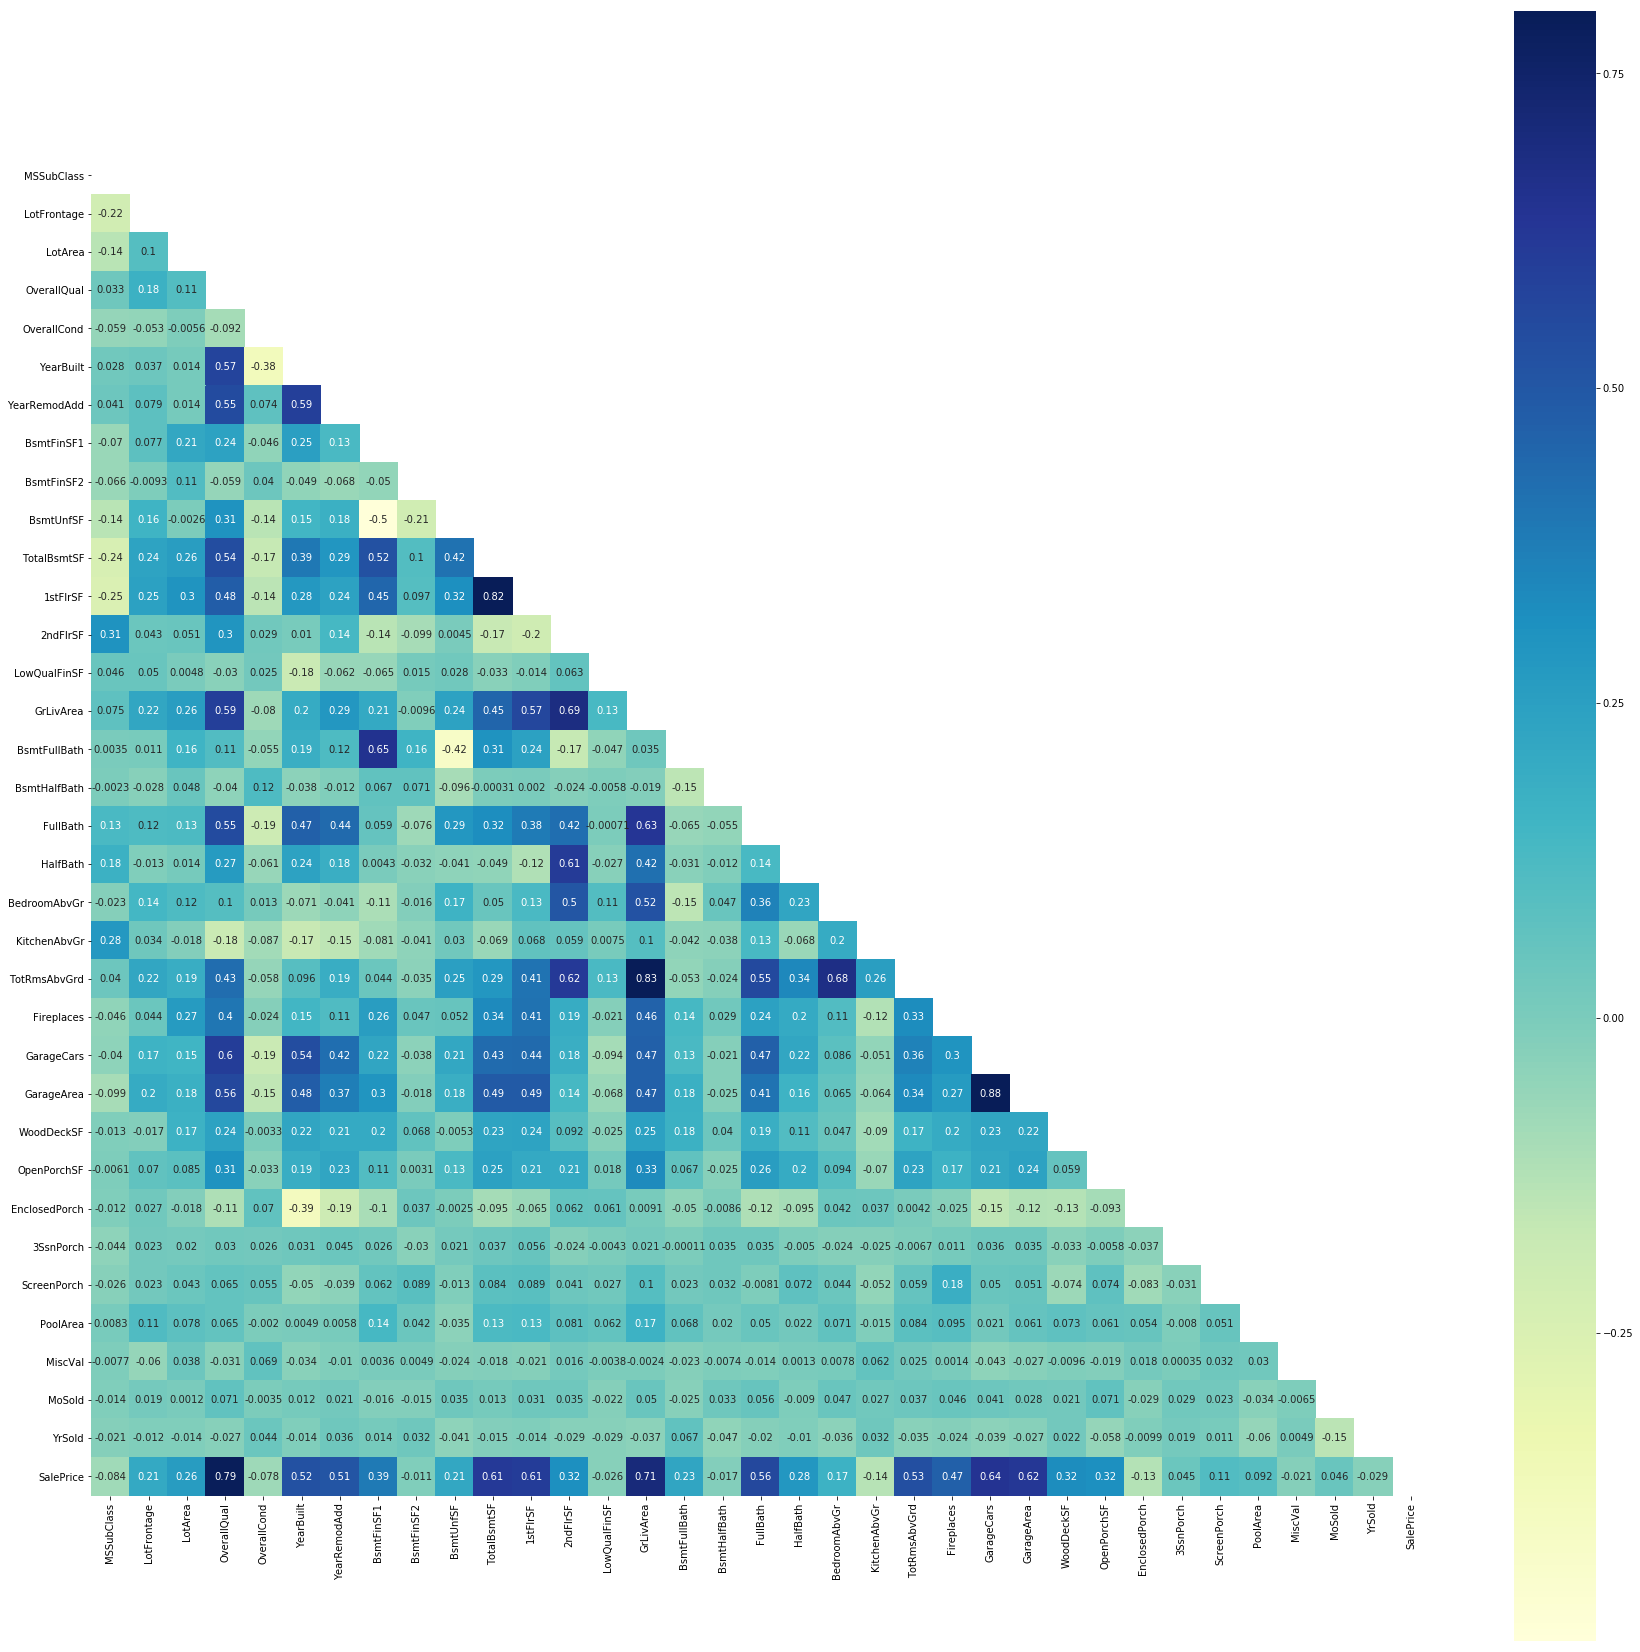

In [107]:
corrmat = dataset_one.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat,mask = mask,annot=True, vmax=.8, square=True, cmap="YlGnBu");

##### Heatmap is a nice way to visualize the correlation matrix. Now let's get some insights from it. 

1) SalePrice is greatly correlated with <b>OverallQual</b> (overall material and finish of the house), <b>GrLivArea</b> (Above grade ground living area square feet) and moderately correlated with <b>GarageArea</b> (no. of cars that can fit in the garage), <b>TotalBsmtSF</b> (total basement floor area), <b>1stFlrSF</b> (1st floor area), <b>YearBuilt</b> (year built), <b>YearRemodAdd </b>(remodel date), <b>FullBath</b>
This infers that these features are informative and hence important. They should be kept in our dataset_one.

2) Now let us see if we have features that are corelated to each other. <b>1stFlrSF</b> is highly correlated with <b>TotalBsmtSF</b> because if higher the TotalBsmtSF higher will be the 1stFlrSF as well. Similarly, <b>TotRoomsAbvGrd</b> is highly correlated with <b>GrLivArea</b> because more number of rooms means higher living area and <b>GarageArea</b> is highly correlated with <b>GarageCars</b> because if you have more garage area you can fit more number of cars in it. 
So we can consider only one of those features beacause these pairs of features give out the same information. I have used <b> 1stFlrSF, GrLivArea, GarageArea </b>. 

#### Listing the categorical categories

In [26]:
n_col = list(dataset_one._get_numeric_data().columns)
cat_col = list(dataset_one.columns)
for c in n_col:
    cat_col.remove(c)
cat_col.append('MSSubClass')
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [27]:
### Removing the GarageYrBlt from categorical column
cat_col.remove('GarageYrBlt')
cat_col;

#### Plotting boxplots to visualize the distributions 

Ploting MSZoning


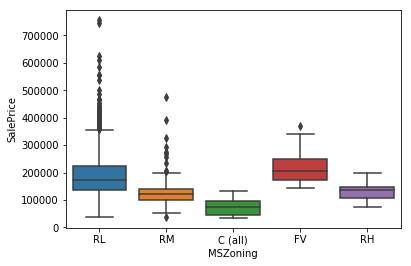

Ploting Street


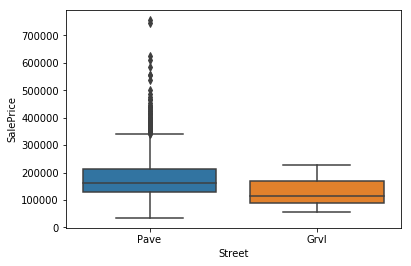

Ploting LotShape


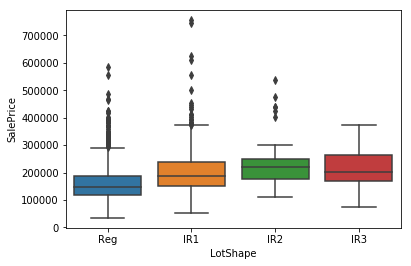

Ploting LandContour


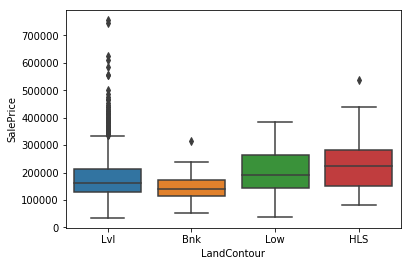

Ploting Utilities


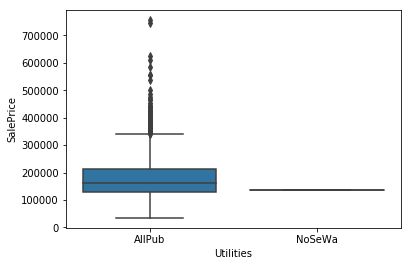

Ploting LotConfig


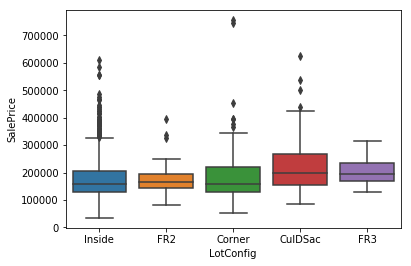

Ploting LandSlope


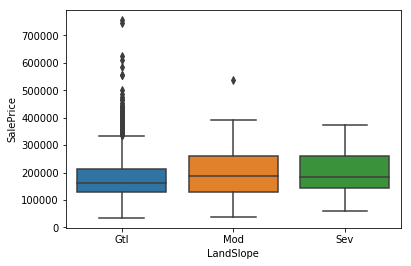

Ploting Neighborhood


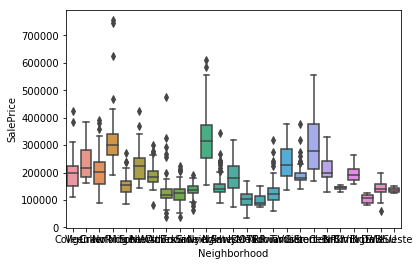

Ploting Condition1


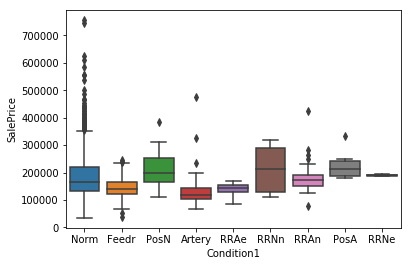

Ploting Condition2


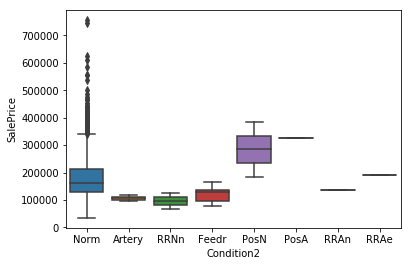

Ploting BldgType


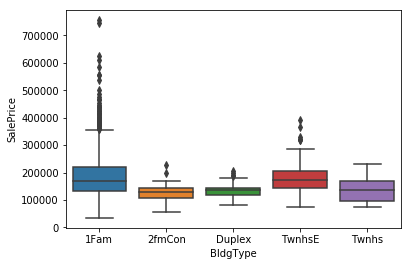

Ploting HouseStyle


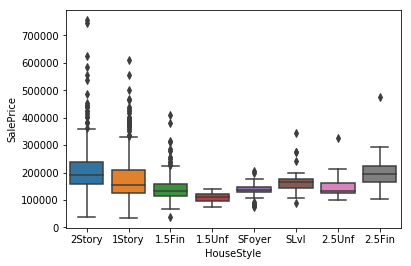

Ploting RoofStyle


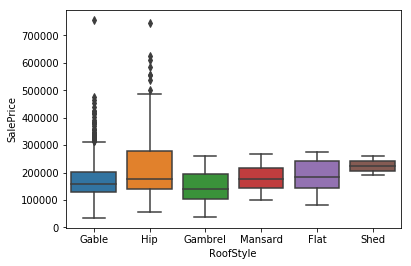

Ploting RoofMatl


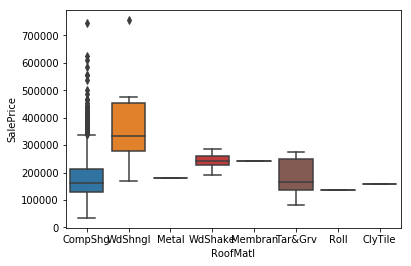

Ploting Exterior1st


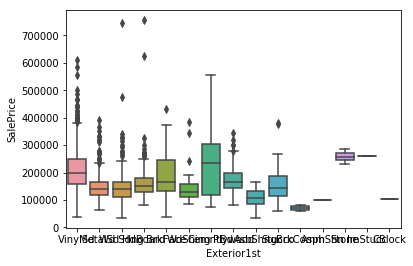

Ploting Exterior2nd


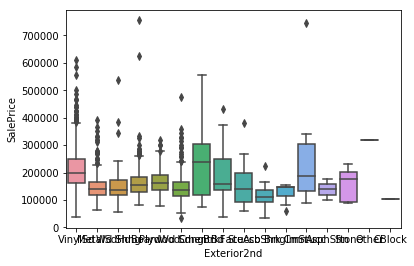

Ploting MasVnrType


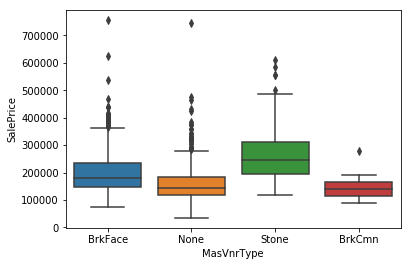

Ploting MasVnrArea


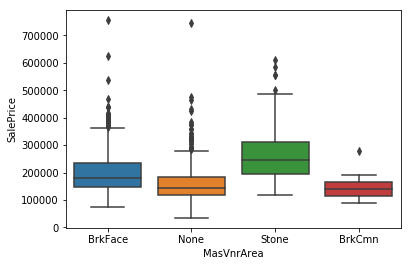

Ploting ExterQual


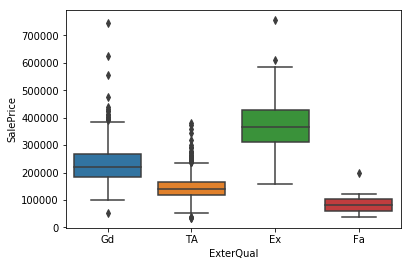

Ploting ExterCond


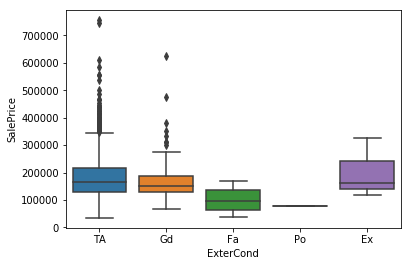

Ploting Foundation


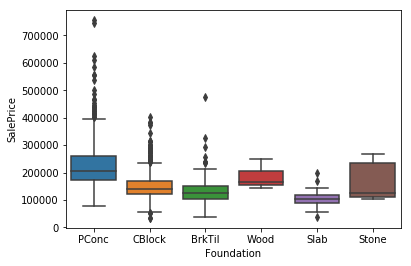

Ploting BsmtQual


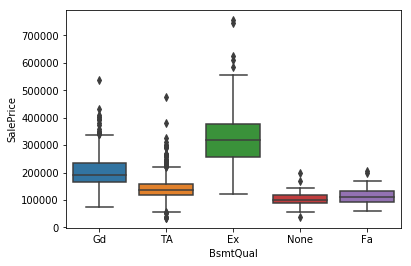

Ploting BsmtCond


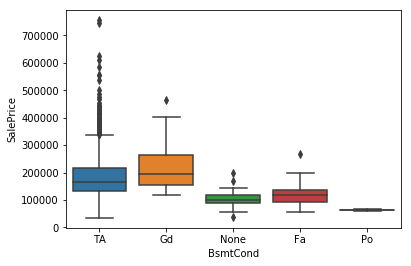

Ploting BsmtExposure


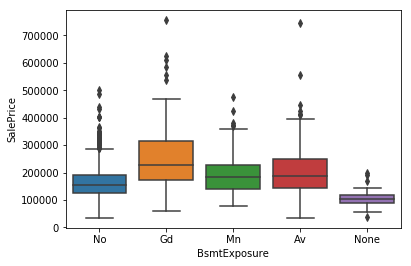

Ploting BsmtFinType1


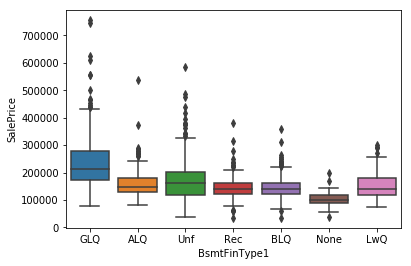

Ploting BsmtFinType2


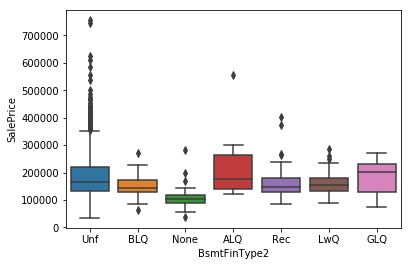

Ploting Heating


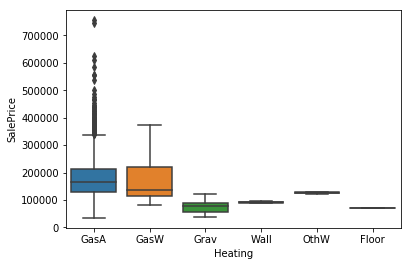

Ploting HeatingQC


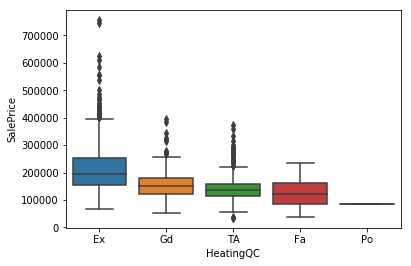

Ploting CentralAir


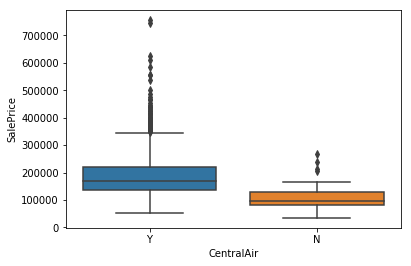

Ploting Electrical


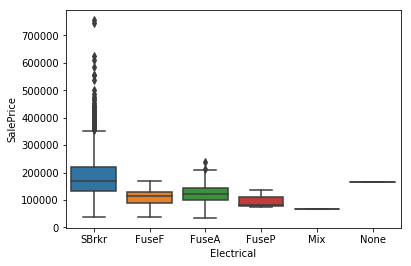

Ploting KitchenQual


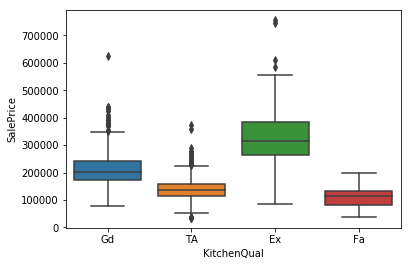

Ploting Functional


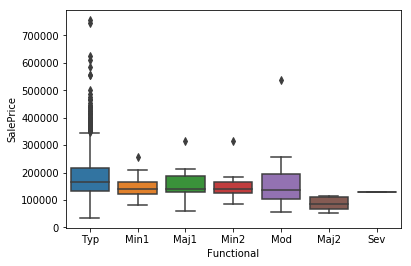

Ploting GarageType


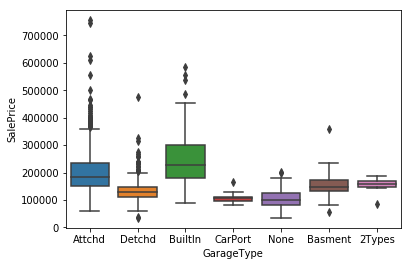

Ploting GarageFinish


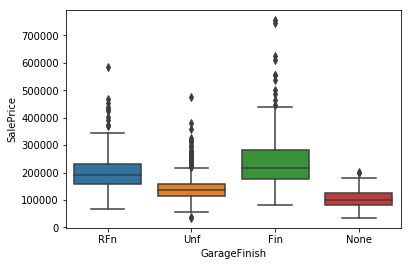

Ploting GarageQual


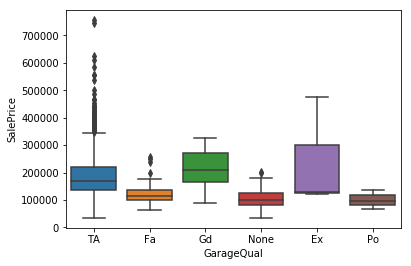

Ploting GarageCond


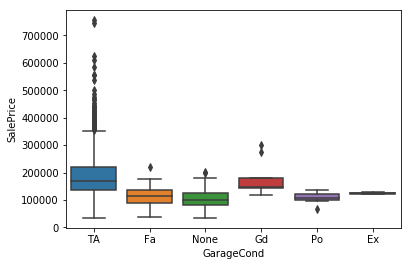

Ploting PavedDrive


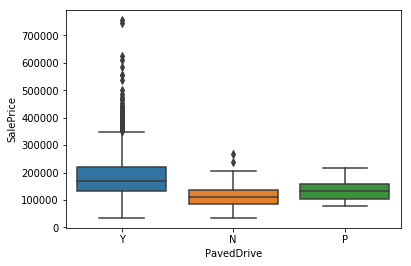

Ploting SaleType


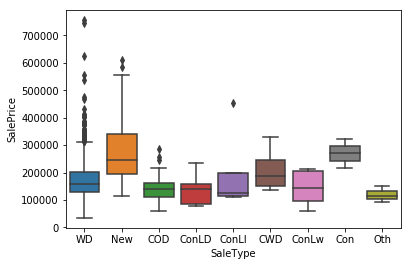

Ploting SaleCondition


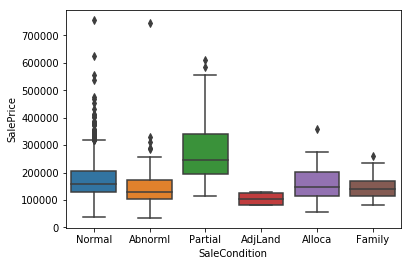

Ploting MSSubClass


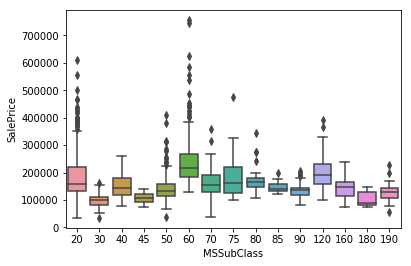

In [133]:
for col in cat_col:
    print("Ploting " + col)
    sns.boxplot(x=col, y="SalePrice", data=dataset_one);
    plt.show()

The categories whose box plots do not overlap or overlap minimally are good features for predicting the values because a specific value of those categories mean that the sale price would lie in a specific range. Such categories based on the above box plots are:
- Neighborhood
- Condition2
-  HouseStyle
-  ROofMatl
-  ExterQual
-  CentralAir
-  KitchenQual

#### Getting the categorical and numerical columns from the dataset and dummifying the categorical variables

In [28]:
X_cat = dataset_one[['Neighborhood','Condition2','HouseStyle','RoofMatl','ExterQual','CentralAir','KitchenQual']]

In [29]:
X_num = dataset_one[['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','FullBath','GarageArea']]

In [30]:
for c in ['Neighborhood','Condition2','HouseStyle','RoofMatl','ExterQual','CentralAir','KitchenQual']:
    #print(c)
    one_hot = pd.get_dummies(X_cat[c], prefix = c, drop_first = True)
    X_cat = X_cat.drop(c,axis=1)
    X_cat = X_cat.join(one_hot)

In [31]:
X = pd.concat([X_cat, X_num], axis=1)

In [32]:
y = dataset_one['SalePrice']

### Splitting the dataset_one into train and test 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creating machine learning models 

#### Linear Regression

In [34]:
#Implementing linear regression
from sklearn.linear_model import LinearRegression
regressor_linreg = LinearRegression()
regressor_linreg.fit(X_train, y_train)
y_pred_linreg = regressor_linreg.predict(X_test)       #predicting the sale prices
#y_scaled_linreg = sc_y.inverse_transform(y_pred_linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
r2_score(y_test,y_pred_linreg)

0.7368554687117537

#### Decision tree 

In [36]:
#implementing Decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train,y_train)
y_pred_dtr = regressor_dtr.predict(X_test)
#y_scaled_dtr = sc_y.inverse_transform(y_pred_dtr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [37]:
r2_score(y_test,y_pred_dtr)

0.7449714139571961

#### Random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor_RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RFR.fit(X_train,y_train)
y_pred_RFR = regressor_RFR.predict(X_test)
#y_scaled_RFR = sc_y.inverse_transform(y_pred_RFR)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
r2_score(y_test,y_pred_RFR)

0.8066565173813918

#### SVM 

In [40]:
#implementing SVM
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'linear')
regressor_svr.fit(X_train,y_train)
y_pred_svr = regressor_svr.predict(X_test)
#y_scaled_svr = sc_y.inverse_transform(y_pred_svr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
r2_score(y_test,y_pred_svr)

0.6482160321121873

### Feature slection based on statistical parameters

In [42]:
dataset_one.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope    ...    EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl    ...                0         0           0   
1    AllPub       FR2       Gtl    ...                0         0           0   
2    AllPub    Inside       Gtl    ...                0         0           0   
3    AllPub    Corner       Gtl    ...              272         0           0   
4    AllPub       FR2       Gtl    ...                0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [44]:
### Getting the categorical column names
n_col = list(dataset_one._get_numeric_data().columns)
cat_col = list(dataset_one.columns)
for c in n_col:
    cat_col.remove(c)
cat_col.append('MSSubClass')

In [45]:
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [46]:
cat_col.remove('GarageYrBlt')
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [47]:
dataset_two = dataset_one

In [48]:
### Dummifgying the categorical variables
for c in cat_col:
    #print(c)
    one_hot = pd.get_dummies(dataset_two[c], prefix = c, drop_first = True)
    dataset_two = dataset_two.drop(c,axis=1)
    dataset_two = dataset_two.join(one_hot)

In [49]:
dataset_two['GarageYrBlt'].loc[dataset_two['GarageYrBlt']=='None'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
list(dataset_two.columns).index('SalePrice')

34

In [117]:
indices = list(range(0,34)) + list(range(35,len(dataset_two.columns)))
X_2 = dataset_two.iloc[:,indices]
y_2 = dataset_two.iloc[:,34].astype('float')

In [118]:
columns = dataset_two.columns[indices]
columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=257)

### I will be using backward elimination technique to get the important features. In this technique we first create a model based on all the features. Then we get the p value for every feature for the model that we created. We eliminate the features with p value>0.05 and then again create a model with the remaining features. we continue this process until the p values for all features are <0.05.

In [119]:
import statsmodels.formula.api as sm
X_2 = np.append(arr = np.ones((len(X_2),1)).astype(int),values = X_2,axis = 1)
regressor_OLS = sm.OLS(endog = y_2.astype(float), exog = X_2.astype(float)).fit()

#### Getting the statistical summary and looking at the p values for all the features

In [120]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     66.39
Date:                Sat, 23 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:29:42   Log-Likelihood:                -16597.
No. Observations:                1460   AIC:                         3.369e+04
Df Residuals:                    1214   BIC:                         3.499e+04
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.207e+05   1.07e+06     -0.676      0.499   -2.81e+06    1.37e+06
x1             6.7332     23.302      0.289      0.773     -38.984      52.450
x2             0.7684      0.110      6.991      0.000       0.553       0.984
x3          6462.1555   1037.646      6.228      0.000    4426.377    8497.934
x4          5770.0700    888.001      6.498      0.000    4027.884    7512.256
x5           336.3345     84.556      3.978      0.000     170.442     502.227
x6            94.7056     55.945      1.693      0.091     -15.054     204.465
x7            17.5420      2.911      6.026      0.000      11.830      23.254
x8             7.7169      6.055      1.275      0.203      -4.162      19.595
x9            -1.6345      2.796     -0.585      0.559      -7.120       3.851
x10           23.6243      4.102      5.759      0.000      15.576      31.672
x11           15.5948      6.454      2.416      0.016       2.932      28.258
x12           36.5499      5.489      6.658      0.000      25.780      47.320
x13          -20.4779     13.954     -1.468      0.142     -47.854       6.898
x14           31.6671      5.656      5.599      0.000      20.571      42.764
x15          322.3201   2003.365      0.161      0.872   -3608.123    4252.763
x16         -417.3864   3055.570     -0.137      0.891   -6412.171    5577.398
x17         3658.2650   2247.960      1.627      0.104    -752.052    8068.582
x18         1173.2334   2125.138      0.552      0.581   -2996.117    5342.584
x19        -3135.1259   1414.883     -2.216      0.027   -5911.012    -359.239
x20        -1.035e+04   6198.088     -1.669      0.095   -2.25e+04    1812.529
x21          984.1662    960.849      1.024      0.306    -900.942    2869.275
x22         2767.0912   1358.513      2.037      0.042     101.798    5432.385
x23          -32.8668     61.369     -0.536      0.592    -153.268      87.535
x24         4248.8959   2305.020      1.843      0.066    -273.368    8771.160
x25           19.0551      7.973      2.390      0.017       3.412      34.698
x26           14.0412      5.898      2.381      0.017       2.470      25.613
x27           -0.2738     11.618     -0.024      0.981     -23.067      22.519
x28            4.4963     12.623      0.356      0.722     -20.268      29.261
x29           32.1649     22.602      1.423      0.155     -12.178      76.508
x30           29.8985     12.426      2.406      0.016       5.520      54.277
x31           82.4895     18.617      4.431      0.000      45.964     119.015
x32            0.1299      1.433      0.091      0.928      -2.681       2.940
x33         -477.9929    248.394     -1.924      0.055    -965.322       9.336
x34         -406.3495    521.680     -0.779      0.436   -1429.843     617.144
x35         3.495e+04   1.22e+04      2.855      0.004    1.09e+04     5.9e+04
x3

#### Getting the indices of the features with p values <0.05

In [121]:
ind = [2,3,4,5,7,10,11,12,14,19,22,25,26,30,31,35,36,37,38,39,47,48,51,52,59,63,67,68,74,78,88,89,107,108,109,110,111,112,113,114,151,152,163,165,168,170,172,175,182,201,202,203,209,214,219,220,222,223,224,225,227,228,242]

#### Getting the names of statistically significant features

In [122]:
columns = columns[ind]
columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'KitchenAbvGr',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LotShape_IR2', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Timber',
       'Condition1_PosA', 'Condition2_RRAe', 'Condition2_RRAn',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'ExterQual_TA',
       'ExterCond_Fa', 'BsmtQual_None', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Mn', 'BsmtExposure_None', 'BsmtFinType1_LwQ',
       'BsmtFinType2_None', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Fun

In [123]:
X_opt = X_2[:,ind]
regressor_OLS = sm.OLS(endog = y_2.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1218.
Date:                Sat, 23 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:29:52   Log-Likelihood:                -16937.
No. Observations:                1460   AIC:                         3.400e+04
Df Residuals:                    1397   BIC:                         3.433e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6266      0.103      6.085      0.000       0.425       0.829
x2          1.053e+04   1000.163     10.525      0.000    8564.713    1.25e+04
x3          3315.7438    732.535      4.526      0.000    1878.758    4752.730
x4          -279.2739     16.999    -16.429      0.000    -312.621    -245.927
x5            12.2659      2.319      5.290      0.000       7.718      16.814
x6            30.8271      3.682      8.373      0.000      23.605      38.049
x7            69.3972     16.691      4.158      0.000      36.655     102.139
x8            84.4103     16.293      5.181      0.000      52.448     116.373
x9           -32.5429     16.046     -2.028      0.043     -64.020      -1.066
x10        -2718.4639   1236.316     -2.199      0.028   -5143.700    -293.228
x11         3942.1548   1404.115      2.808      0.005    1187.753    6696.557
x12           37.7716      5.340      7.073      0.000      27.297      48.247
x13           16.6497      6.335      2.628      0.009       4.222      29.077
x14           15.9319     13.553      1.176      0.240     -10.655      42.518
x15           59.3014     19.698      3.010      0.003      20.660      97.943
x16         5.632e+04      1e+04      5.620      0.000    3.67e+04     7.6e+04
x17         2.521e+04   1.14e+04      2.212      0.027    2853.444    4.76e+04
x18         4.124e+04   9389.232      4.392      0.000    2.28e+04    5.97e+04
x19         2.353e+04   9415.768      2.499      0.013    5059.204     4.2e+04
x20         2.063e+04   1.21e+04      1.711      0.087   -3017.335    4.43e+04
x21         1.248e+04   3078.734      4.053      0.000    6437.897    1.85e+04
x22        -1864.4048   4077.722     -0.457      0.648   -9863.523    6134.714
x23         5666.0248   3722.202      1.522      0.128   -1635.682     1.3e+04
x24        -4.972e+04   1.17e+04     -4.233      0.000   -7.28e+04   -2.67e+04
x25         -1.06e+04   3040.037     -3.487      0.001   -1.66e+04   -4636.883
x26        -8418.0782   4132.257     -2.037      0.042   -1.65e+04    -311.980
x27         3.875e+04   4848.451      7.992      0.000    2.92e+04    4.83e+04
x28         2.565e+04   3963.253      6.471      0.000    1.79e+04    3.34e+04
x29         3.257e+04   5860.264      5.557      0.000    2.11e+04    4.41e+04
x30          1.16e+04   2187.375      5.302      0.000    7306.437    1.59e+04
x31        -2.024e+05   2.01e+04    -10.076      0.000   -2.42e+05   -1.63e+05
x32        -8.252e+04   4.26e+04     -1.938      0.053   -1.66e+05     999.808
x33         4.742e+04   3.24e+04      1.463      0.144   -1.62e+04    1.11e+05
x34         5.298e+05   3.01e+04     17.592      0.000    4.71e+05    5.89e+05
x35         5.905e+05   4.23e+04     13.974      0.000    5.08e+05    6.73e+05
x36         5.671e+05   4.26e+04     13.326      0.000    4.84e+05    6.51e+05
x3

In [124]:
ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,20,23,24,25,26,27,28,29,30,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62]

In [ ]:
[['Neighborhood','Condition2','HouseStyle','RoofMatl','ExterQual','CentralAir','KitchenQual']][['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','FullBath','GarageArea']]


In [125]:
columns = columns[ind]
columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'KitchenAbvGr',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_FR2',
       'Neighborhood_Blueste', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Timber',
       'Condition1_PosA', 'Condition2_RRAe', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'ExterQual_TA', 'ExterCond_Fa', 'BsmtQual_None', 'BsmtCond_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_None', 'BsmtFinType1_LwQ',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'GarageType_Attchd', 'GarageType_None', 'GarageQual_Gd',
       'GarageQual_None', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
  

In [126]:
X_opt = X_opt[:,ind]
regressor_OLS = sm.OLS(endog = y_2.astype(float), exog = X_opt.astype(float)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1391.
Date:                Sat, 23 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:30:06   Log-Likelihood:                -16943.
No. Observations:                1460   AIC:                         3.400e+04
Df Residuals:                    1405   BIC:                         3.429e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5824      0.098      5.915      0.000       0.389       0.776
x2          1.052e+04    994.564     10.579      0.000    8570.200    1.25e+04
x3          3445.0595    727.427      4.736      0.000    2018.100    4872.020
x4          -272.2278     16.349    -16.651      0.000    -304.299    -240.156
x5            12.5850      2.309      5.450      0.000       8.055      17.115
x6            31.2338      3.666      8.520      0.000      24.042      38.425
x7            67.2536     16.689      4.030      0.000      34.516      99.991
x8            82.8611     16.288      5.087      0.000      50.909     114.813
x9           -30.1830     16.027     -1.883      0.060     -61.622       1.256
x10        -2964.4386   1232.573     -2.405      0.016   -5382.320    -546.557
x11         4219.4464   1393.014      3.029      0.002    1486.835    6952.057
x12           36.9879      5.308      6.969      0.000      26.576      47.400
x13           15.1412      6.265      2.417      0.016       2.851      27.431
x14           56.2230     19.401      2.898      0.004      18.165      94.281
x15         5.803e+04   9811.628      5.915      0.000    3.88e+04    7.73e+04
x16         2.745e+04   1.12e+04      2.452      0.014    5494.045    4.94e+04
x17         4.334e+04   9148.902      4.737      0.000    2.54e+04    6.13e+04
x18         2.542e+04   9191.817      2.766      0.006    7391.371    4.35e+04
x19         1.264e+04   3070.140      4.117      0.000    6616.813    1.87e+04
x20        -4.617e+04   1.06e+04     -4.350      0.000    -6.7e+04   -2.53e+04
x21        -1.039e+04   3032.141     -3.426      0.001   -1.63e+04   -4439.276
x22        -7858.5762   4102.685     -1.915      0.056   -1.59e+04     189.471
x23         3.855e+04   4842.451      7.961      0.000    2.91e+04    4.81e+04
x24         2.548e+04   3963.482      6.428      0.000    1.77e+04    3.33e+04
x25         3.292e+04   5857.746      5.620      0.000    2.14e+04    4.44e+04
x26          1.19e+04   2181.045      5.456      0.000    7621.582    1.62e+04
x27        -2.028e+05   2.01e+04    -10.092      0.000   -2.42e+05   -1.63e+05
x28          5.34e+05   2.99e+04     17.835      0.000    4.75e+05    5.93e+05
x29         5.905e+05    4.2e+04     14.057      0.000    5.08e+05    6.73e+05
x30         5.664e+05   4.22e+04     13.408      0.000    4.84e+05    6.49e+05
x31         5.274e+05   4.07e+04     12.946      0.000    4.48e+05    6.07e+05
x32         5.188e+05    3.1e+04     16.743      0.000    4.58e+05     5.8e+05
x33         5.406e+05   3.24e+04     16.695      0.000    4.77e+05    6.04e+05
x34         5.739e+05   3.17e+04     18.114      0.000    5.12e+05    6.36e+05
x35        -2.326e+04   4420.190     -5.262      0.000   -3.19e+04   -1.46e+04
x36        -3.156e+04   4651.352     -6.785      0.000   -4.07e+04   -2.24e+04
x3

### Splitting the dataset into train and test samples

In [129]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_opt, y_2, test_size=0.3, random_state=0)

### Creating machine learning models

#### Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train_2,y_train_2)
y_pred_linear_reg_2 = regressor.predict(X_test_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
r2_score(y_test_2,y_pred_linear_reg_2)

0.6723471387521658

#### Decision tree

In [133]:
#implementing Decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train_2,y_train_2)
y_pred_dtr_2 = regressor_dtr.predict(X_test_2)
#y_scaled_dtr = sc_y.inverse_transform(y_pred_dtr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [134]:
r2_score(y_test_2,y_pred_dtr_2)

0.7888001400434488

#### Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor_RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RFR.fit(X_train_2,y_train_2)
y_pred_RFR_2 = regressor_RFR.predict(X_test_2)
#y_scaled_RFR = sc_y.inverse_transform(y_pred_RFR)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
r2_score(y_test_2,y_pred_RFR_2)

0.8338315889691141

### Summary:
In this project we discussed handling missing values, dealing with ouliers, feature selection, different machine learning models and evaluating their performance based on R2 value. 
We found that by basing the feature selection on manual selection (visual means) we select around 14 features and by basing it on statistical measures we select 35 features. By selecting more features we get an increase in r2 score by 0.3. 
Out of all the machine learning models that we applied, we got better performance by using decision tree model. 